### 1. Read Data

In [1]:
# Imports
import pandas as pd

# Read in 2 Data Files and Combine, Mark as M/F
female_data = pd.read_csv('/home/hice1/cclark339/scratch/Data/single_nuc_1/file_list_female_parsed_with_data.csv')
male_data = pd.read_csv('/home/hice1/cclark339/scratch/Data/single_nuc_1/file_list_male_parsed_with_data.csv')

female_data['gender'] = 0  # Female data is 0
male_data['gender'] = 1    # Male data is 1

combined_data = pd.concat([female_data, male_data], ignore_index=True)
# combined_data.to_csv('combined_dataset.csv', index=False)
print(combined_data.shape)

combined_data

(1001966, 17)


,experiment_name,video_base_name,track_id,count_uncalibrated,new_count_uncalibrated,xc,yc,u_dot,v_dot,s_dot,class_id,p_value,track_length,w,h,frame,gender
0,MC_singlenuc23_1_Tk33_021220,0001_vid,1330,0,382058,117.405639,104.372970,6.973857,22.796302,4094.324244,0.0,0.951274,4209,90.968022,178.890712,382058,0
1,MC_singlenuc23_1_Tk33_021220,0001_vid,1330,1,382059,123.302195,123.913192,6.585702,21.623125,4154.148577,0.0,0.948788,4209,97.082408,211.697543,382059,0
2,MC_singlenuc23_1_Tk33_021220,0001_vid,1330,10,382068,111.683189,400.633206,-0.382109,28.731078,1993.790100,0.0,0.971033,4209,116.128018,283.932432,382068,0
3,MC_singlenuc23_1_Tk33_021220,0001_vid,1330,100,382158,821.635502,527.801237,5.468046,-3.778739,82.335724,0.0,0.975735,4209,170.506534,138.563970,382158,0
4,MC_singlenuc23_1_Tk33_021220,0001_vid,1330,1000,383058,883.833486,309.388663,2.265553,0.529649,-4.429363,0.0,0.958767,4209,99.582545,202.605340,383058,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001961,MC_singlenuc96_b1_Tk41_081120,0001_vid,9350,95,537123,156.276651,671.360475,4.437002,6.482767,23.792231,0.0,0.934901,305,174.453026,77.335526,537123,1
1001962,MC_singlenuc96_b1_Tk41_081120,0001_vid,9350,96,537124,162.206921,672.395285,4.571728,5.991240,25.240829,0.0,0.932262,305,185.882436,73.302906,537124,1
1001963,MC_singlenuc96_b1_Tk41_081120,0001_vid,9350,97,537125,170.841343,672.257588,4.938269,5.438280,26.805397,0.0,0.946115,305,195.640927,70.389400,537125,1
1001964,MC_singlenuc96_b1_Tk41_081120,0001_vid,9350,98,537126,178.862178,673.323482,5.216379,5.043803,29.915899,0.0,0.952906,305,205.052418,68.460573,537126,1


In [5]:
# Rename Data
data = combined_data

# Create Unique Identifier
data['id'] = data['experiment_name'] + '__' + data['video_base_name'] + '__' + data['track_id'].astype(str)

# Save Class ID for Later Comparison
class_id_array = data[['gender', 'id']].copy()

# Drop Potential Labels
data.drop('gender', inplace=True, axis=1) 

# Drop Cols that We Might Need
data.drop('w', inplace=True, axis=1) 
data.drop('h', inplace=True, axis=1) 
data.drop('s_dot', inplace=True, axis=1) 
data.drop('p_value', inplace=True, axis=1) 
data.drop('track_id', inplace=True, axis=1) 
data.drop('class_id', inplace=True, axis=1)
data.drop('track_length', inplace=True, axis=1) 
data.drop('experiment_name', inplace=True, axis=1) 
data.drop('video_base_name', inplace=True, axis=1) 
data.drop('count_uncalibrated', inplace=True, axis=1) 
data.drop('new_count_uncalibrated', inplace=True, axis=1) 

# Remove Requested IDs
print(data.shape)
# ids_to_remove = [
#     'MC_singlenuc23_8_Tk33_031720__0001_vid__2488',
#     'MC_singlenuc24_4_Tk47_030320__0002_vid__3426',
#     'MC_singlenuc35_11_Tk61_051220__0002_vid__1635',
#     'MC_singlenuc35_11_Tk61_051220__0002_vid__3257',
#     'MC_singlenuc35_11_Tk61_051220__0002_vid__45',
#     'MC_singlenuc35_11_Tk61_051220__0002_vid__622',
#     'MC_singlenuc41_2_Tk9_030920__0001_vid__5076',
#     'MC_singlenuc43_11_Tk41_060220__0001_vid__296',
#     'MC_singlenuc45_7_Tk47_050720__0002_vid__2524',
#     'MC_singlenuc55_2_Tk47_051220__0001_vid__1093',
#     'MC_singlenuc59_4_Tk61_060220__0001_vid__3510',
#     'MC_singlenuc59_4_Tk61_060220__0001_vid__5827',
#     'MC_singlenuc76_3_Tk47_072920__0001_vid__1007',
#     'MC_singlenuc96_b1_Tk41_081120__0001_vid__6696',
#     'MC_singlenuc96_b1_Tk41_081120__0001_vid__8437',
#     'MC_singlenuc96_b1_Tk41_081120__0001_vid__8641',
#     'MC_singlenuc96_b1_Tk41_081120__0001_vid__8792',
#     'MC_singlenuc96_b1_Tk41_081120__0001_vid__8893'
# ]
# data = data[~data['id'].isin(ids_to_remove)]
# class_id_array = class_id_array[~class_id_array['id'].isin(ids_to_remove)]
print(data.shape)

# Rename DF
df = data

# Check Modified Data
print("Modified CSV Data: \n")
df
# print(data)

(1001966, 6)
(1001966, 6)
Modified CSV Data: 



,xc,yc,u_dot,v_dot,frame,id
0,117.405639,104.372970,6.973857,22.796302,382058,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
1,123.302195,123.913192,6.585702,21.623125,382059,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
2,111.683189,400.633206,-0.382109,28.731078,382068,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
3,821.635502,527.801237,5.468046,-3.778739,382158,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
4,883.833486,309.388663,2.265553,0.529649,383058,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
...,...,...,...,...,...,...
1001961,156.276651,671.360475,4.437002,6.482767,537123,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350
1001962,162.206921,672.395285,4.571728,5.991240,537124,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350
1001963,170.841343,672.257588,4.938269,5.438280,537125,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350
1001964,178.862178,673.323482,5.216379,5.043803,537126,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350


In [6]:
# Add in Labels
# print(class_id_array.tail())
averaged_class_id = class_id_array.groupby('id')['gender'].mean().round().astype(int).reset_index()
averaged_class_id = averaged_class_id.rename(columns={'id': 'id2'})

averaged_class_id

,id2,gender
0,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,0
1,MC_singlenuc23_1_Tk33_021220__0001_vid__1573,0
2,MC_singlenuc23_1_Tk33_021220__0001_vid__1640,0
3,MC_singlenuc23_1_Tk33_021220__0001_vid__1748,0
4,MC_singlenuc23_1_Tk33_021220__0001_vid__2085,0
...,...,...
666,MC_singlenuc96_b1_Tk41_081120__0001_vid__8792,1
667,MC_singlenuc96_b1_Tk41_081120__0001_vid__8893,1
668,MC_singlenuc96_b1_Tk41_081120__0001_vid__9161,0
669,MC_singlenuc96_b1_Tk41_081120__0001_vid__9345,0


### 2. Combine Frames by Track & Create Features

In [7]:
# Imports
import numpy as np

In [8]:
# Engineered Features
def calculate_speed(df):
    df['speed'] = np.sqrt(df.loc[:, 'u_dot']**2 + df.loc[:, 'v_dot']**2)
    return df

def calculate_outreach_ratio(df):
    start_x, start_y = df.iloc[0][['xc', 'yc']]
    end_x, end_y = df.iloc[-1][['xc', 'yc']]
    displacement = np.sqrt((end_x - start_x)**2 + (end_y - start_y)**2)
    path_length = df['speed'].sum()
    outreach_ratio = displacement / path_length if path_length != 0 else 0
    return outreach_ratio

def calculate_acceleration(u_dot, v_dot, time_intervals):
    u_dot = np.array(u_dot)
    v_dot = np.array(v_dot)
    time_intervals = np.array(time_intervals)
    ax = np.diff(u_dot) / time_intervals[:-1]
    ay = np.diff(v_dot) / time_intervals[:-1]
    acceleration = np.sqrt(ax**2 + ay**2)
    return ax, ay, acceleration

def calculate_distance_traveled(xc, yc):
    xc = np.array(xc)
    yc = np.array(yc)
    dx = np.diff(xc)
    dy = np.diff(yc)
    distances = np.sqrt(dx**2 + dy**2)
    distance_traveled = np.sum(distances)
    return distance_traveled

In [9]:
# Create Features from TrackID
features = []
grouped = data.groupby('id')

for track_id, group in grouped:
    group = group.sort_values(by='frame')
    speed = calculate_speed(group)['speed'].mean()
    outreach_ratio = calculate_outreach_ratio(group)
    time_intervals = group['frame'].diff().fillna(1).values  # Assume frame difference as time interval
    ax, ay, acceleration = calculate_acceleration(group['u_dot'], group['v_dot'], time_intervals)
    mean_acceleration = np.mean(acceleration)
    distance_traveled = calculate_distance_traveled(group['xc'], group['yc'])
    features.append({
        'id': track_id,
        'speed': speed,
        'outreach_ratio': outreach_ratio,
        'mean_acceleration': mean_acceleration,
        'distance_traveled': distance_traveled
    })

features_df = pd.DataFrame(features)
features_df

,id,speed,outreach_ratio,mean_acceleration,distance_traveled
0,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,2.669734,0.086335,0.281946,15439.795210
1,MC_singlenuc23_1_Tk33_021220__0001_vid__1573,2.306083,0.027860,0.272332,19066.584148
2,MC_singlenuc23_1_Tk33_021220__0001_vid__1640,2.884547,0.032662,0.269384,12638.557458
3,MC_singlenuc23_1_Tk33_021220__0001_vid__1748,2.867001,0.088994,0.295195,7729.860738
4,MC_singlenuc23_1_Tk33_021220__0001_vid__2085,2.646049,0.021937,0.268153,10632.973318
...,...,...,...,...,...
666,MC_singlenuc96_b1_Tk41_081120__0001_vid__8792,7.188265,0.222151,0.562417,4535.982335
667,MC_singlenuc96_b1_Tk41_081120__0001_vid__8893,4.243637,0.212326,0.447011,1659.786611
668,MC_singlenuc96_b1_Tk41_081120__0001_vid__9161,1.225791,0.143379,0.143933,5789.845947
669,MC_singlenuc96_b1_Tk41_081120__0001_vid__9345,2.434414,0.081309,0.216220,4567.240841


In [10]:
# Create DF to Compare to Labels
combined_df = pd.concat([features_df, averaged_class_id], axis=1)
comparison_df = combined_df.drop(columns=['id2'])
comparison_df = comparison_df.rename(columns={'gender': 'is_male'})
comparison_df

,id,speed,outreach_ratio,mean_acceleration,distance_traveled,is_male
0,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,2.669734,0.086335,0.281946,15439.795210,0
1,MC_singlenuc23_1_Tk33_021220__0001_vid__1573,2.306083,0.027860,0.272332,19066.584148,0
2,MC_singlenuc23_1_Tk33_021220__0001_vid__1640,2.884547,0.032662,0.269384,12638.557458,0
3,MC_singlenuc23_1_Tk33_021220__0001_vid__1748,2.867001,0.088994,0.295195,7729.860738,0
4,MC_singlenuc23_1_Tk33_021220__0001_vid__2085,2.646049,0.021937,0.268153,10632.973318,0
...,...,...,...,...,...,...
666,MC_singlenuc96_b1_Tk41_081120__0001_vid__8792,7.188265,0.222151,0.562417,4535.982335,1
667,MC_singlenuc96_b1_Tk41_081120__0001_vid__8893,4.243637,0.212326,0.447011,1659.786611,1
668,MC_singlenuc96_b1_Tk41_081120__0001_vid__9161,1.225791,0.143379,0.143933,5789.845947,0
669,MC_singlenuc96_b1_Tk41_081120__0001_vid__9345,2.434414,0.081309,0.216220,4567.240841,0


In [11]:
# Tally Males and Females
tally = comparison_df['is_male'].value_counts()
print(tally)

is_male
0    418
1    235
Name: count, dtype: int64


In [11]:
comparison_df.to_csv('/home/hice1/cclark339/scratch/Data/single_nuc_1/aggregate_track_features.csv', index=False)

### 3. Split Data

In [8]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(comparison_df, test_size=0.1, random_state=42)
print(train_df.shape)
print(test_df.shape)

(587, 6)
(66, 6)


In [9]:
print(train_df)

                                                 id     speed  outreach_ratio  \
577    MC_singlenuc91_b1_Tk9_081120__0001_vid__2594  5.685658        0.091999   
633   MC_singlenuc96_b1_Tk41_081120__0001_vid__1490  1.284351        0.277433   
357    MC_singlenuc59_4_Tk61_060220__0001_vid__6081  1.357269        0.204141   
165     MC_singlenuc36_2_Tk3_030320__0001_vid__6367  4.808747        0.101014   
611  MC_singlenuc94_b1_Tk31_081120__0001_vid__13436  3.796143        0.029767   
..                                              ...       ...             ...   
71       MC_singlenuc24_4_Tk47_030320__0002_vid__97  4.469454        0.203392   
106    MC_singlenuc34_3_Tk43_030320__0001_vid__3921  6.848159        0.132124   
270    MC_singlenuc45_7_Tk47_050720__0002_vid__2593  3.656903        0.747736   
435     MC_singlenuc65_4_Tk9_072920__0002_vid__2299  5.095371        0.219034   
102   MC_singlenuc34_3_Tk43_030320__0001_vid__14814  3.889388        0.408020   

     mean_acceleration  dis

### 3.5 PCA

In [10]:
# Imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
# Get Needed Info
X_train_for_pca = train_df.drop(columns=['is_male', 'id'])
X_test_for_pca = test_df.drop(columns=['is_male', 'id'])

In [12]:
# Standardize the features
scaler = StandardScaler()
X_train_for_pca_scaled = scaler.fit_transform(X_train_for_pca)
scaler = StandardScaler()
X_test_for_pca_scaled = scaler.fit_transform(X_test_for_pca)

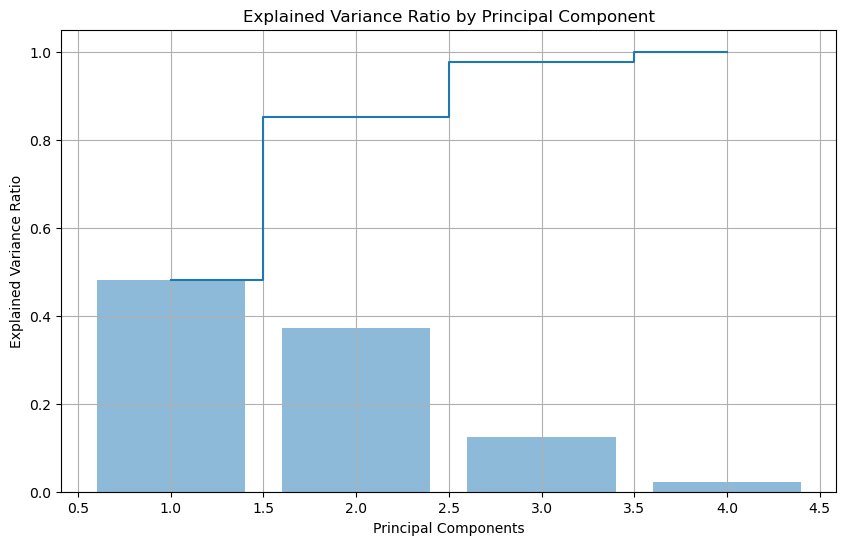

In [14]:
import matplotlib.pyplot as plt

# The n_components is the number of features you want your features collapsed into.
pca = PCA(n_components = 4)
pca.fit(X_train_for_pca_scaled)
x_pca = pca.transform(X_train_for_pca_scaled)

# Scree Plot
### Percentages of Variation that Each PC Accounts For
### Step Function Shows the Cumulative Contribution
plt.figure(figsize=(10, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.grid(True)
plt.show()

In [ ]:
# Initialize PCA
pca = PCA(n_components=3)
pca.fit(X_train_for_pca_scaled)

# Transform the data
X_train_pca = pca.transform(X_train_for_pca_scaled)
X_test_pca = pca.transform(X_test_for_pca_scaled)

# Convert the result back to a dataframe for easier interpretation
X_train_pca_df = pd.DataFrame(X_train_for_pca_scaled, columns=[f'PC{i+1}' for i in range(X_train_for_pca_scaled.shape[1])])
X_train_pca_df['is_male'] = averaged_class_id['gender'].values
print(X_train_pca_df.head())
X_test_pca_df = pd.DataFrame(X_test_for_pca_scaled, columns=[f'PC{i+1}' for i in range(X_test_for_pca_scaled.shape[1])])
X_test_pca_df['is_male'] = averaged_class_id['true_labels'].values
print(X_test_pca_df.head())

# Dump the PCA components and see the contributions of each feature
component_names = [f'PC{i+1}' for i in range(X_train_for_pca_scaled.shape[1])]
feature_names = scaler.get_feature_names_out()
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=component_names)
print(components_df)

In [ ]:
training_data = training_data_ids_and_labels.merge(X_train_pca_df, left_index=True, right_index=True)
training_data = training_data.drop('is_male_x', axis=1)
training_data = training_data.rename(columns={'is_male_y': 'is_male'})
print(training_data)

In [ ]:
testing_data = testing_data_ids_and_labels.merge(X_test_pca_df, left_index=True, right_index=True)
testing_data = testing_data.drop('is_male', axis=1)
print(testing_data)

### 4. Cluster Data for Additional Feature Based on Training

In [9]:
# This cell is to prevent the KMeans memory leak on Windows with MKL.
import os
os.environ['OMP_NUM_THREADS'] = '3'

In [10]:
# Imports
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

In [11]:
# Data
data = train_df.drop(columns=['is_male', 'id'])
print(data)

        speed  outreach_ratio  mean_acceleration  distance_traveled
577  5.685658        0.091999           0.359992        2120.843568
633  1.284351        0.277433           0.199595         904.329060
357  1.357269        0.204141           0.130170        4665.668347
165  4.808747        0.101014           0.418331        8253.542556
611  3.796143        0.029767           0.380977        3060.875314
..        ...             ...                ...                ...
71   4.469454        0.203392           0.302483        2615.042270
106  6.848159        0.132124           0.575422        9637.132413
270  3.656903        0.747736           0.223323        1204.035349
435  5.095371        0.219034           0.498550        5763.261859
102  3.889388        0.408020           0.327125        2084.076719

[587 rows x 4 columns]


In [12]:
# Update Var Name
X_train = data

Silhouette Score for 2 clusters: 0.5962325914382028
Silhouette Score for 3 clusters: 0.6120209559700212
Silhouette Score for 4 clusters: 0.5671409082200777
Silhouette Score for 5 clusters: 0.5448616181123732
Silhouette Score for 6 clusters: 0.5475546925046624
Silhouette Score for 7 clusters: 0.5171868736998556
Silhouette Score for 8 clusters: 0.5261402892912026
Silhouette Score for 9 clusters: 0.5083210226048636
Silhouette Score for 10 clusters: 0.5145249782836913
Silhouette Score for 11 clusters: 0.5058159136842711
Silhouette Score for 12 clusters: 0.5091266564939676
Best number of clusters based on Silhouette Score: 3


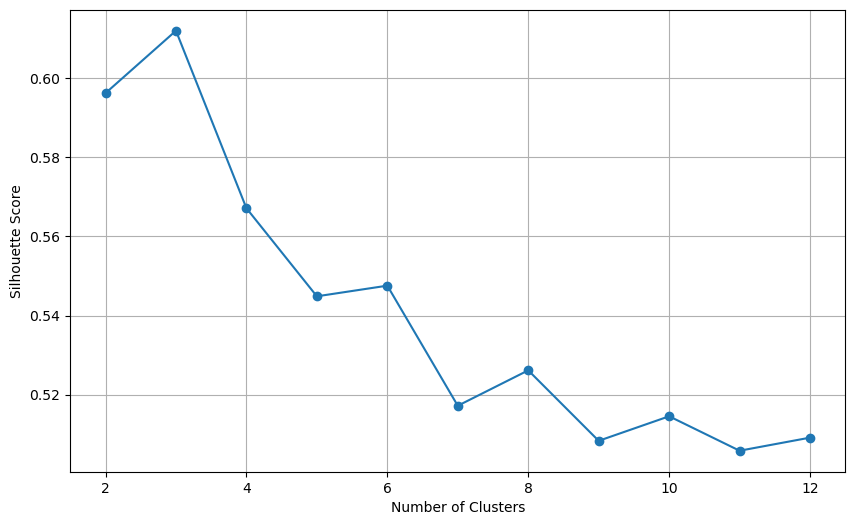

In [13]:
best_score = -1
best_num_clusters = None
silhouette_scores = []
num_clusters_list = []

for i in range(2, 13):
    bch = Birch(n_clusters=i)
    labels = bch.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, labels, metric='euclidean')
    print("Silhouette Score for " + str(i) + " clusters:", silhouette_avg)
    silhouette_scores.append(silhouette_avg)
    num_clusters_list.append(i)
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_num_clusters = i

print("Best number of clusters based on Silhouette Score:", best_num_clusters)

plt.figure(figsize=(10, 6))
plt.plot(num_clusters_list, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [14]:
# Cluster
birch = Birch(n_clusters = 3)
birch = birch.fit(data.values)
labels = birch.predict(data.values)
data['cluster'] = birch.fit_predict(data)

# Check Clusters
print(data.tail())

        speed  outreach_ratio  mean_acceleration  distance_traveled  cluster
71   4.469454        0.203392           0.302483        2615.042270        1
106  6.848159        0.132124           0.575422        9637.132413        0
270  3.656903        0.747736           0.223323        1204.035349        1
435  5.095371        0.219034           0.498550        5763.261859        1
102  3.889388        0.408020           0.327125        2084.076719        1


In [ ]:
# Pair Plot
sns.pairplot(data, hue='cluster', diag_kind='kde')
plt.show()

In [16]:
# Check Data
print(data)

        speed  outreach_ratio  mean_acceleration  distance_traveled  cluster
577  5.685658        0.091999           0.359992        2120.843568        1
633  1.284351        0.277433           0.199595         904.329060        1
357  1.357269        0.204141           0.130170        4665.668347        1
165  4.808747        0.101014           0.418331        8253.542556        0
611  3.796143        0.029767           0.380977        3060.875314        1
..        ...             ...                ...                ...      ...
71   4.469454        0.203392           0.302483        2615.042270        1
106  6.848159        0.132124           0.575422        9637.132413        0
270  3.656903        0.747736           0.223323        1204.035349        1
435  5.095371        0.219034           0.498550        5763.261859        1
102  3.889388        0.408020           0.327125        2084.076719        1

[587 rows x 5 columns]


In [17]:
# Add Real Label
data = pd.merge(data, train_df[['is_male', 'id']], left_index=True, right_index=True)
print(data)
#data.to_csv('5_Features_with_ID_90_Percent_Disinclude_IDs.csv', index=False)

        speed  outreach_ratio  mean_acceleration  distance_traveled  cluster  \
577  5.685658        0.091999           0.359992        2120.843568        1   
633  1.284351        0.277433           0.199595         904.329060        1   
357  1.357269        0.204141           0.130170        4665.668347        1   
165  4.808747        0.101014           0.418331        8253.542556        0   
611  3.796143        0.029767           0.380977        3060.875314        1   
..        ...             ...                ...                ...      ...   
71   4.469454        0.203392           0.302483        2615.042270        1   
106  6.848159        0.132124           0.575422        9637.132413        0   
270  3.656903        0.747736           0.223323        1204.035349        1   
435  5.095371        0.219034           0.498550        5763.261859        1   
102  3.889388        0.408020           0.327125        2084.076719        1   

     is_male                           

### 5. Cluster Testing Data for Future Use

In [18]:
# Check Test Data
print(test_df)

                                               id     speed  outreach_ratio  \
109  MC_singlenuc34_3_Tk43_030320__0001_vid__5339  3.427861        0.199292   
274  MC_singlenuc45_7_Tk47_050720__0002_vid__3868  2.358489        0.112493   
199   MC_singlenuc40_2_Tk3_030920__0001_vid__3337  2.650354        0.285453   
429   MC_singlenuc65_4_Tk9_072920__0002_vid__1427  5.451525        0.048889   
447   MC_singlenuc65_4_Tk9_072920__0002_vid__6651  5.809478        0.044468   
..                                            ...       ...             ...   
334   MC_singlenuc56_2_Tk65_051220__0003_vid__416  2.592307        0.232560   
291  MC_singlenuc55_2_Tk47_051220__0001_vid__2620  2.101094        0.073558   
236   MC_singlenuc41_2_Tk9_030920__0001_vid__4852  1.670250        0.182483   
44    MC_singlenuc23_8_Tk33_031720__0001_vid__494  3.275614        0.232256   
81   MC_singlenuc28_1_Tk3_022520__0003_vid__23531  1.713950        0.082322   

     mean_acceleration  distance_traveled  is_male 

In [19]:
# Remove Track ID and Cluster
features_df = test_df
features_df_no_track_id = features_df.drop('id', axis=1)
features_df_no_track_id = features_df_no_track_id.drop('is_male', axis=1)
print(features_df_no_track_id)
predicted_clusters = birch.predict(features_df_no_track_id)

# Add to DF
features_df = features_df.assign(predicted_clusters=predicted_clusters)
test_df_prepared = features_df
print(test_df_prepared)
#test_df_prepared.to_csv('5_Features_with_ID_90_Percent_Disinclude_IDs_TEST.csv', index=False)

        speed  outreach_ratio  mean_acceleration  distance_traveled
109  3.427861        0.199292           0.377195        1387.612405
274  2.358489        0.112493           0.185607        3424.388132
199  2.650354        0.285453           0.206539        3833.747829
429  5.451525        0.048889           0.503387       13601.221454
447  5.809478        0.044468           0.541134       21557.168150
..        ...             ...                ...                ...
334  2.592307        0.232560           0.218279        5159.751257
291  2.101094        0.073558           0.230155        6403.468278
236  1.670250        0.182483           0.151172        5081.713539
44   3.275614        0.232256           0.340647        2869.981473
81   1.713950        0.082322           0.182981        4707.349631

[66 rows x 4 columns]
                                               id     speed  outreach_ratio  \
109  MC_singlenuc34_3_Tk43_030320__0001_vid__5339  3.427861        0.199292   
274

In [20]:
# Looks like Some Predictive Power Here
# Cluster = 7 is 93.62% likely to be a female.
# Cluster = 2 is 80.49% likely to be a female.
# Let's save clustering algorithm to joblib file.
import joblib

# num_features_gm = gm.n_features_in_
# print(num_features_gm)
# joblib.dump(birch, 'gaussian_mixture_model_disincludeIDs.pkl')
# joblib.dump(labels, 'labels_disincludeIDs.pkl')

### 6. Use Basic DT

In [21]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import learning_curve, validation_curve, cross_val_score

In [22]:
# Check Train Data
train_data = data
print(train_data)

        speed  outreach_ratio  mean_acceleration  distance_traveled  cluster  \
577  5.685658        0.091999           0.359992        2120.843568        1   
633  1.284351        0.277433           0.199595         904.329060        1   
357  1.357269        0.204141           0.130170        4665.668347        1   
165  4.808747        0.101014           0.418331        8253.542556        0   
611  3.796143        0.029767           0.380977        3060.875314        1   
..        ...             ...                ...                ...      ...   
71   4.469454        0.203392           0.302483        2615.042270        1   
106  6.848159        0.132124           0.575422        9637.132413        0   
270  3.656903        0.747736           0.223323        1204.035349        1   
435  5.095371        0.219034           0.498550        5763.261859        1   
102  3.889388        0.408020           0.327125        2084.076719        1   

     is_male                           

In [25]:
# Check Test Data
test_data = test_df_prepared
test_data = test_data.rename(columns={'predicted_clusters': 'cluster'})
print(test_data)

                                               id     speed  outreach_ratio  \
109  MC_singlenuc34_3_Tk43_030320__0001_vid__5339  3.427861        0.199292   
274  MC_singlenuc45_7_Tk47_050720__0002_vid__3868  2.358489        0.112493   
199   MC_singlenuc40_2_Tk3_030920__0001_vid__3337  2.650354        0.285453   
429   MC_singlenuc65_4_Tk9_072920__0002_vid__1427  5.451525        0.048889   
447   MC_singlenuc65_4_Tk9_072920__0002_vid__6651  5.809478        0.044468   
..                                            ...       ...             ...   
334   MC_singlenuc56_2_Tk65_051220__0003_vid__416  2.592307        0.232560   
291  MC_singlenuc55_2_Tk47_051220__0001_vid__2620  2.101094        0.073558   
236   MC_singlenuc41_2_Tk9_030920__0001_vid__4852  1.670250        0.182483   
44    MC_singlenuc23_8_Tk33_031720__0001_vid__494  3.275614        0.232256   
81   MC_singlenuc28_1_Tk3_022520__0003_vid__23531  1.713950        0.082322   

     mean_acceleration  distance_traveled  is_male 

In [26]:
# Split into X and y
X_train = train_data.drop('is_male', axis=1)
X_test = test_data.drop('is_male', axis=1)
X_train = X_train.drop('id', axis=1)
X_test = X_test.drop('id', axis=1)
y_train = train_data['is_male']
y_test = test_data['is_male']

# Remove Clustering
X_train.drop(columns=['cluster'], inplace=True)
X_test.drop(columns=['cluster'], inplace=True)

# Check Shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(587, 4)
(66, 4)
(587,)
(66,)


In [27]:
# Use Sklearn
classifier = DecisionTreeClassifier(random_state=0)

# Train
classifier.fit(X_train, y_train)

# Test
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy on Default: {accuracy*100:.2f}%")

Test Accuracy on Default: 68.18%


### 7. Tune Basic DT

Best Min Samples Leaf: 50


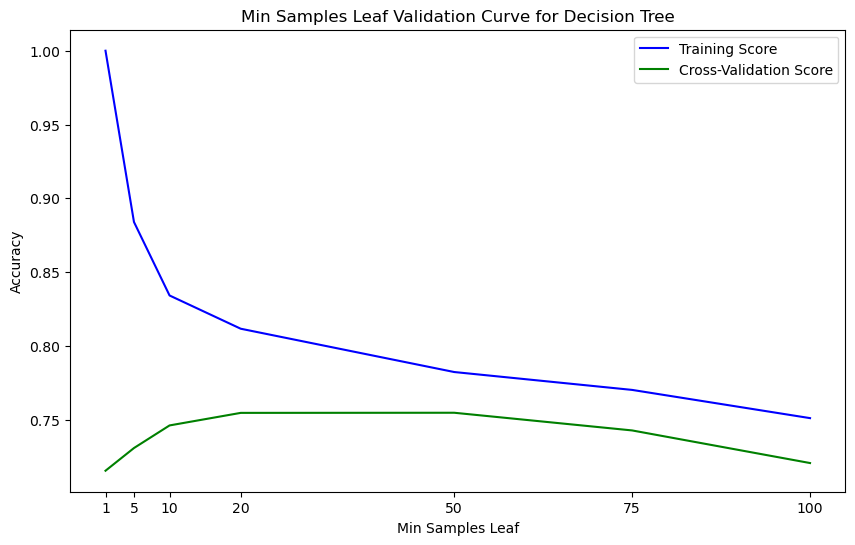

In [28]:
# Reset DT
decision_tree_clf = DecisionTreeClassifier(random_state=0)

# Create Validation Curve
min_samples_values = [1, 5, 10, 20, 50, 75, 100]
train_scores, test_scores = validation_curve(
    decision_tree_clf, 
    X_train, 
    y_train, 
    param_name="min_samples_leaf", 
    param_range=min_samples_values, 
    cv=10, 
    scoring="accuracy", 
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the Validation Curve
plt.figure(figsize=(10, 6))
plt.title('Min Samples Leaf Validation Curve for Decision Tree')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')

# Plot Scores
plt.plot(min_samples_values, train_scores_mean, label='Training Score', color='blue')
plt.plot(min_samples_values, test_scores_mean, label='Cross-Validation Score', color='green')
plt.legend(loc="best")
plt.xticks(min_samples_values)

# Find Max Score Index and Get Corresponding Value
best_min_samples_index = np.argmax(np.mean(test_scores, axis=1))
best_min_samples_leaf = min_samples_values[best_min_samples_index]
print("Best Min Samples Leaf:", best_min_samples_leaf)

# Save Plot for Report
plt.show()

Best Min Samples Split: 100


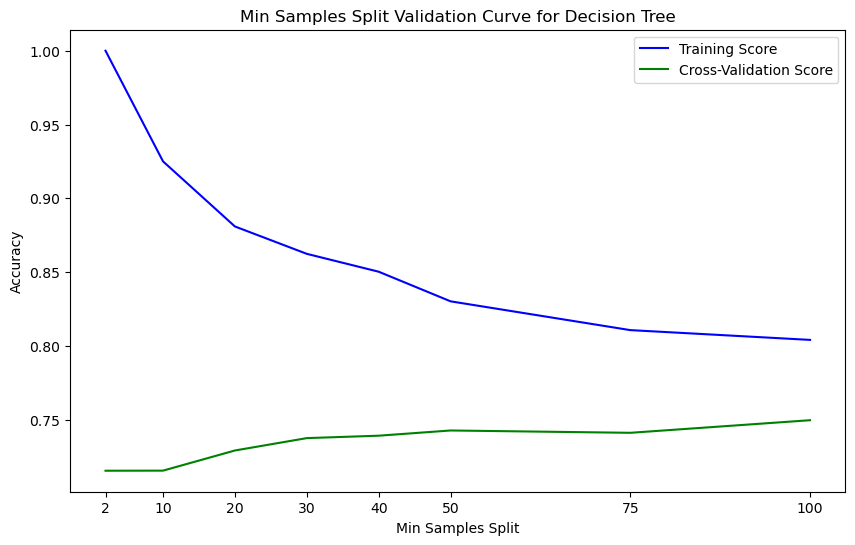

In [29]:
# Reset DT
decision_tree_clf = DecisionTreeClassifier(random_state=0)

# Create Validation Curve
min_samples_values = [2, 10, 20, 30, 40, 50, 75, 100]
train_scores, test_scores = validation_curve(
    decision_tree_clf, 
    X_train, 
    y_train, 
    param_name="min_samples_split", 
    param_range=min_samples_values, 
    cv=10, 
    scoring="accuracy", 
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the Validation Curve
plt.figure(figsize=(10, 6))
plt.title('Min Samples Split Validation Curve for Decision Tree')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')

# Plot Scores
plt.plot(min_samples_values, train_scores_mean, label='Training Score', color='blue')
plt.plot(min_samples_values, test_scores_mean, label='Cross-Validation Score', color='green')
plt.legend(loc="best")
plt.xticks(min_samples_values)

# Find Max Score Index and Get Corresponding Value
best_min_samples_index = np.argmax(np.mean(test_scores, axis=1))
best_min_samples_split = min_samples_values[best_min_samples_index]
print("Best Min Samples Split:", best_min_samples_split)

# Save Plot for Report
plt.show()

Best Max Depth: 5


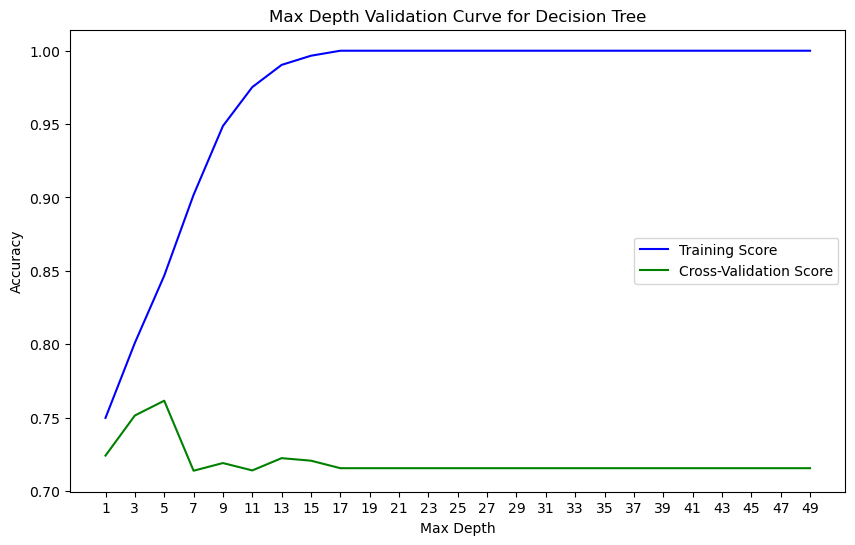

In [30]:
# Reset DT
decision_tree_clf = DecisionTreeClassifier(random_state=0)

# Create Validation Curve
max_depth_values = np.arange(1, 51, 2)
train_scores, test_scores = validation_curve(
    decision_tree_clf, 
    X_train, 
    y_train, 
    param_name="max_depth", 
    param_range=max_depth_values, 
    cv=10, 
    scoring="accuracy", 
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the Validation Curve
plt.figure(figsize=(10, 6))
plt.title('Max Depth Validation Curve for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

# Plot Scores
plt.plot(max_depth_values, train_scores_mean, label='Training Score', color='blue')
plt.plot(max_depth_values, test_scores_mean, label='Cross-Validation Score', color='green')
plt.legend(loc="best")
plt.xticks(max_depth_values)

# Find Max Score Index and Get Corresponding Value
best_max_depth_index = np.argmax(np.mean(test_scores, axis=1))
best_max_depth = max_depth_values[best_max_depth_index]
print("Best Max Depth:", best_max_depth)

# Save Plot for Report
plt.show()

gini: 0.7597311513734659
entropy: 0.7392752776154295
log_loss: 0.7392752776154295
gini


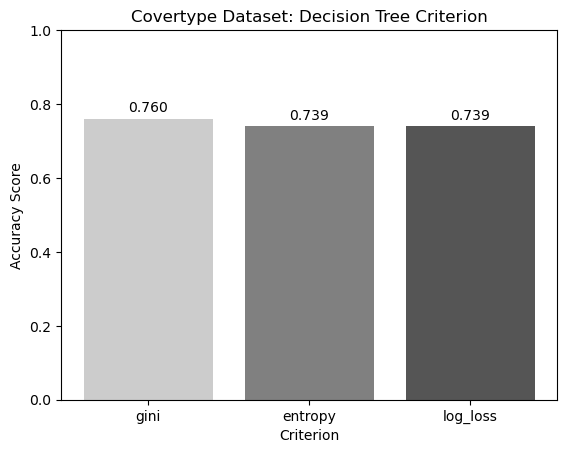

In [31]:
# Compare Criteria
criteria = ['gini', 'entropy', 'log_loss']
performance_scores = []
accuracy_scorer = make_scorer(accuracy_score)
best_score = -1
best_criteria = ''

# Save Info for Each
for criterion in criteria:
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=best_max_depth, random_state=42)
    clf.fit(X_train, y_train)
    cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=accuracy_scorer, n_jobs=-1)
    y_pred = clf.predict(X_test)
    
    # Get the Mean Validation Score on the Last Sample
    last_sample_score = np.mean(cross_val_scores)
    
    # Get this Mean
    performance = np.mean(cross_val_scores)
    print(str(criterion) + ": "+ str(performance))
    performance_scores.append(performance)
    
    # Save Best Hyperparameter Value
    if last_sample_score > best_score:
        best_score = last_sample_score
        best_criteria = criterion
        
# Print Best
print(best_criteria)

# Create Chart
plt.bar(criteria, performance_scores, color=['#CCCCCC', '#808080', '#555555'])
plt.title('Covertype Dataset: Decision Tree Criterion')
plt.xlabel('Criterion')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
for i, performance in enumerate(performance_scores):
    plt.text(i, performance + 0.01, f'{performance:.3f}', ha='center', va='bottom')
# plt.savefig('Covertype_DT_VC_Criterion.png')
plt.show()

In [32]:
# Use Sklearn
classifier = DecisionTreeClassifier(random_state=0, 
                                   criterion=best_criteria,
                                   max_depth=best_max_depth,
                                   min_samples_split=best_min_samples_split,
                                   min_samples_leaf=best_min_samples_leaf)

# Train
classifier.fit(X_train, y_train)
y_train_pred = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

# Test
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy on Tuned: {accuracy*100:.2f}%")

Training Accuracy: 79.05%
Test Accuracy on Tuned: 80.30%


In [33]:
X_combined = np.vstack((X_train.values, X_test.values))  # Convert DataFrame to NumPy array and stack
y_combined = np.hstack((y_train, y_test))  # Combine labels
y_pred_combined = np.hstack((y_train_pred, y_pred))
is_test = np.hstack((np.zeros(len(X_train)), np.ones(len(X_test))))
column_names = X_train.columns
df_X_combined = pd.DataFrame(X_combined, columns=column_names)
df_y_combined = pd.DataFrame({
    'actual': y_combined,
    'predicted': y_pred_combined,
    'is_test': is_test
})
df_combined = pd.concat([df_X_combined, df_y_combined], axis=1)
print(df_combined.head())

      speed  outreach_ratio  mean_acceleration  distance_traveled  actual  \
0  5.685658        0.091999           0.359992        2120.843568       0   
1  1.284351        0.277433           0.199595         904.329060       0   
2  1.357269        0.204141           0.130170        4665.668347       1   
3  4.808747        0.101014           0.418331        8253.542556       1   
4  3.796143        0.029767           0.380977        3060.875314       0   

   predicted  is_test  
0          0      0.0  
1          0      0.0  
2          0      0.0  
3          1      0.0  
4          0      0.0  


In [34]:
y_actual = df_combined['actual']
y_predicted = df_combined['predicted']
accuracy = accuracy_score(y_actual, y_predicted)
print(f"Combined Accuracy (DONT USE): {accuracy*100:.2f}%")

Combined Accuracy (DONT USE): 79.17%


In [35]:
test_count = df_combined['is_test'].sum()
print(f"Number of test samples: {test_count}")

train_count = len(df_combined) - test_count
print(f"Number of training samples: {train_count}")

Number of test samples: 66.0
Number of training samples: 587.0


### 8. Dump DT

In [36]:
# Re-init
classifier = DecisionTreeClassifier(random_state=0, 
                                   criterion=best_criteria,
                                   max_depth=best_max_depth,
                                   min_samples_split=best_min_samples_split,
                                   min_samples_leaf=best_min_samples_leaf)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       random_state=0)

In [37]:
# Imports
from sklearn.tree import export_graphviz

# Copy Results to Viewer like https://dreampuf.github.io/GraphvizOnline
feature_names = X_train.columns.tolist()
#export_graphviz(classifier, feature_names=feature_names, out_file='decision_tree_disincludeIDs.dot')

In [38]:
# Print X_train for Reference
print(X_train)

        speed  outreach_ratio  mean_acceleration  distance_traveled
577  5.685658        0.091999           0.359992        2120.843568
633  1.284351        0.277433           0.199595         904.329060
357  1.357269        0.204141           0.130170        4665.668347
165  4.808747        0.101014           0.418331        8253.542556
611  3.796143        0.029767           0.380977        3060.875314
..        ...             ...                ...                ...
71   4.469454        0.203392           0.302483        2615.042270
106  6.848159        0.132124           0.575422        9637.132413
270  3.656903        0.747736           0.223323        1204.035349
435  5.095371        0.219034           0.498550        5763.261859
102  3.889388        0.408020           0.327125        2084.076719

[587 rows x 4 columns]


[Text(0.6538461538461539, 0.9166666666666666, 'mean_acceleration <= 0.384\ngini = 0.46\nsamples = 587\nvalue = [376.0, 211.0]'),
 Text(0.46153846153846156, 0.75, 'distance_traveled <= 5393.645\ngini = 0.378\nsamples = 466\nvalue = [348, 118]'),
 Text(0.3076923076923077, 0.5833333333333334, 'mean_acceleration <= 0.316\ngini = 0.239\nsamples = 260\nvalue = [224, 36]'),
 Text(0.23076923076923078, 0.4166666666666667, 'distance_traveled <= 4332.171\ngini = 0.167\nsamples = 196\nvalue = [178, 18]'),
 Text(0.15384615384615385, 0.25, 'outreach_ratio <= 0.254\ngini = 0.118\nsamples = 143\nvalue = [134, 9]'),
 Text(0.07692307692307693, 0.08333333333333333, 'gini = 0.071\nsamples = 81\nvalue = [78, 3]'),
 Text(0.23076923076923078, 0.08333333333333333, 'gini = 0.175\nsamples = 62\nvalue = [56, 6]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.282\nsamples = 53\nvalue = [44, 9]'),
 Text(0.38461538461538464, 0.4166666666666667, 'gini = 0.404\nsamples = 64\nvalue = [46, 18]'),
 Text(0.6153846153846154,

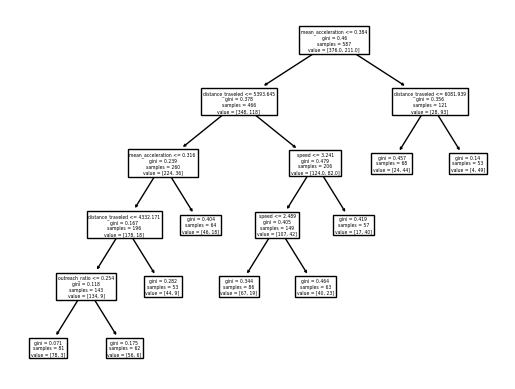

In [39]:
# Imports
from sklearn.tree import plot_tree

decision_tree_clf = DecisionTreeClassifier(random_state=0, 
                                   criterion=best_criteria,
                                   max_depth=best_max_depth,
                                   min_samples_split=best_min_samples_split,
                                   min_samples_leaf=best_min_samples_leaf)
decision_tree_clf.fit(X_train, y_train)

# Visualize Here
feature_names = X_train.columns.tolist()
plot_tree(decision_tree_clf, feature_names=feature_names)

In [40]:
# Explain with Words
# Source: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
decision_tree_clf = DecisionTreeClassifier(random_state=0, 
                                   criterion=best_criteria,
                                   max_depth=best_max_depth,
                                   min_samples_split=best_min_samples_split,
                                   min_samples_leaf=best_min_samples_leaf)
decision_tree_clf.fit(X_train, y_train)
clf = decision_tree_clf
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 17 nodes and has the following tree structure:

node=0 is a split node with value=[[0.64054514 0.35945486]]: go to node 1 if X[:, 2] <= 0.3841192424297333 else to node 14.
	node=1 is a split node with value=[[0.74678112 0.25321888]]: go to node 2 if X[:, 3] <= 5393.645263671875 else to node 9.
		node=2 is a split node with value=[[0.86153846 0.13846154]]: go to node 3 if X[:, 2] <= 0.31634092330932617 else to node 8.
			node=3 is a split node with value=[[0.90816327 0.09183673]]: go to node 4 if X[:, 3] <= 4332.1708984375 else to node 7.
				node=4 is a split node with value=[[0.93706294 0.06293706]]: go to node 5 if X[:, 1] <= 0.25399942696094513 else to node 6.
					node=5 is a leaf node with value=[[0.96296296 0.03703704]].
					node=6 is a leaf node with value=[[0.90322581 0.09677419]].
				node=7 is a leaf node with value=[[0.83018868 0.16981132]].
			node=8 is a leaf node with value=[[0.71875 0.28125]].
		node=9 is a split node with value=[[0.6019417

### 9. Check DT using Rules Learned

In [41]:
# Ensure the columns are numeric, coercing errors
X_train['mean_acceleration'] = pd.to_numeric(X_train['mean_acceleration'], errors='coerce')
X_train['distance_traveled'] = pd.to_numeric(X_train['distance_traveled'], errors='coerce')
X_train['speed'] = pd.to_numeric(X_train['speed'], errors='coerce')

X_test['mean_acceleration'] = pd.to_numeric(X_test['mean_acceleration'], errors='coerce')
X_test['distance_traveled'] = pd.to_numeric(X_test['distance_traveled'], errors='coerce')
X_test['speed'] = pd.to_numeric(X_test['speed'], errors='coerce')

# Drop rows with NaN values (optional)
X_train = X_train.dropna()
X_test = X_test.dropna()

# Ensure corresponding y values are also dropped
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

# Define the prediction function
def predict_gender_2(mean_acceleration, distance_traveled, speed):
    if mean_acceleration > 0.38412:
        return 'male'
    elif distance_traveled <= 5393.64526:
        return 'female'
    elif mean_acceleration <= 0.38412 and distance_traveled > 5393.64526 and speed <= 3.24055:
        return 'female'
    else:
        return 'male'

# Apply the decision rules to the training and test sets
y_pred_train_2 = X_train.apply(lambda row: predict_gender_2(row['mean_acceleration'], row['distance_traveled'], row['speed']), axis=1)
y_pred_test_2 = X_test.apply(lambda row: predict_gender_2(row['mean_acceleration'], row['distance_traveled'], row['speed']), axis=1)

# Map categorical predictions to numeric labels
label_mapping_2 = {'male': 1, 'female': 0}
y_pred_train_numeric_2 = y_pred_train_2.map(label_mapping_2)
y_pred_test_numeric_2 = y_pred_test_2.map(label_mapping_2)

# Calculate accuracy
train_accuracy_2 = accuracy_score(y_train, y_pred_train_numeric_2)
test_accuracy_2 = accuracy_score(y_test, y_pred_test_numeric_2)

print(f"Train Accuracy: {train_accuracy_2 * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy_2 * 100:.2f}%")

Train Accuracy: 79.05%
Test Accuracy: 80.30%


In [42]:
# Confirm Exclusions Applied
print(X_train.shape)
print(X_test.shape)

(587, 4)
(66, 4)


### 10. Run Metrics, Script from Another Anon Author

In [43]:
"""
Created on Mon Jun 17 18:01:44 2024

@author: removed_for_review
"""

class Metrics:
    """
    A class to calculate various metrics for binary classification.

    Attributes:
        label (array-like): Ground truth binary labels.
        predict (array-like): Predicted binary labels.
        tp (int): True Positives.
        tn (int): True Negatives.
        fp (int): False Positives.
        fn (int): False Negatives.
        total (int): Total number of samples.
        pp (float): Proportion of positive samples.
        pn (float): Proportion of negative samples.
        tpr (float): True Positive Rate (Sensitivity).
        tnr (float): True Negative Rate (Specificity).
        fpr (float): False Positive Rate.
        fnr (float): False Negative Rate.
        acc (float): Accuracy.
        pprecision (float): Positive Precision.
        nprecision (float): Negative Precision.
        precall (float): Positive Recall.
        nrecall (float): Negative Recall.
        pFm (float): Positive F-measure.
        nFm (float): Negative F-measure.
        bacc (float): Balanced Accuracy.
        mcc (float): Matthews Correlation Coefficient.
    """
    def __init__(self, label, predict):
        """
        Initialize the Metrics class with ground truth labels and predictions.

        Parameters:
            label (array-like): Ground truth binary labels.
            predict (array-like): Predicted binary labels.
        """
        print('label=1 is positive, label=0 is negative')
        self.label=label
        self.predict=predict

        self.tp = np.sum((self.label == 1) & (self.predict == 1))
        self.tn = np.sum((self.label == 0) & (self.predict == 0))
        self.fp = np.sum((self.label == 0) & (self.predict == 1))
        self.fn = np.sum((self.label == 1) & (self.predict == 0))

        # Rates
        self.total=self.tp+self.tn+self.fp+self.fn
        self.pp=(self.tp+self.fn)/self.total
        self.pn=(self.tn+self.fp)/self.total
        self.tpr=self.tp/(self.tp+self.fn)
        self.tnr=self.tn/(self.tn+self.fp)
        self.fpr=self.fp/(self.tn+self.fp)
        self.fnr=self.fn/(self.tp+self.fn)

        # General Metrics
        self.acc=(self.tp+self.tn)/self.total
        self.pprecision=self.tp/(self.tp+self.fp)
        self.nprecision=self.tn/(self.tn+self.fn)
        self.precall=self.tpr
        self.nrecall=self.tnr
        self.pFm=2*(self.tp)/(2*self.tp+self.tn+self.fp)
        self.nFm=2*(self.tn)/(2*self.tn+self.tp+self.fn)
        
        # For Unbalanced Datasets
        self.bacc=0.5*(self.tpr+self.tnr)
        self.mcc=(self.tp*self.tn-self.fp*self.fn)/np.sqrt((self.tp+self.fp)*(self.tp+self.fn)*(self.tn+self.fp)*(self.tn+self.fn))

In [44]:
label = y_test
predict = y_pred
metrics = Metrics(label, predict)

print("True Positives:", metrics.tp)
print("True Negatives:", metrics.tn)
print("False Positives:", metrics.fp)
print("False Negatives:", metrics.fn)
print("Accuracy:", metrics.acc)
print("Positive Precision:", metrics.pprecision)
print("Negative Precision:", metrics.nprecision)
print("Positive Recall:", metrics.precall)
print("Negative Recall:", metrics.nrecall)
print("Balanced Accuracy:", metrics.bacc)
print("Matthews Correlation Coefficient:", metrics.mcc)

label=1 is positive, label=0 is negative
True Positives: 19
True Negatives: 34
False Positives: 8
False Negatives: 5
Accuracy: 0.803030303030303
Positive Precision: 0.7037037037037037
Negative Precision: 0.8717948717948718
Positive Recall: 0.7916666666666666
Negative Recall: 0.8095238095238095
Balanced Accuracy: 0.8005952380952381
Matthews Correlation Coefficient: 0.5882042694939653


## Charlie Experiments

In [8]:
df

,xc,yc,u_dot,v_dot,frame,id
0,117.405639,104.372970,6.973857,22.796302,382058,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
1,123.302195,123.913192,6.585702,21.623125,382059,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
2,111.683189,400.633206,-0.382109,28.731078,382068,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
3,821.635502,527.801237,5.468046,-3.778739,382158,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
4,883.833486,309.388663,2.265553,0.529649,383058,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
...,...,...,...,...,...,...
1001961,156.276651,671.360475,4.437002,6.482767,537123,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350
1001962,162.206921,672.395285,4.571728,5.991240,537124,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350
1001963,170.841343,672.257588,4.938269,5.438280,537125,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350
1001964,178.862178,673.323482,5.216379,5.043803,537126,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350


In [9]:
data

,xc,yc,u_dot,v_dot,frame,id
0,117.405639,104.372970,6.973857,22.796302,382058,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
1,123.302195,123.913192,6.585702,21.623125,382059,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
2,111.683189,400.633206,-0.382109,28.731078,382068,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
3,821.635502,527.801237,5.468046,-3.778739,382158,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
4,883.833486,309.388663,2.265553,0.529649,383058,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
...,...,...,...,...,...,...
1001961,156.276651,671.360475,4.437002,6.482767,537123,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350
1001962,162.206921,672.395285,4.571728,5.991240,537124,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350
1001963,170.841343,672.257588,4.938269,5.438280,537125,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350
1001964,178.862178,673.323482,5.216379,5.043803,537126,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350


In [10]:
averaged_class_id

,id2,gender
0,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,0
1,MC_singlenuc23_1_Tk33_021220__0001_vid__1573,0
2,MC_singlenuc23_1_Tk33_021220__0001_vid__1640,0
3,MC_singlenuc23_1_Tk33_021220__0001_vid__1748,0
4,MC_singlenuc23_1_Tk33_021220__0001_vid__2085,0
...,...,...
648,MC_singlenuc96_b1_Tk41_081120__0001_vid__873,0
649,MC_singlenuc96_b1_Tk41_081120__0001_vid__877,1
650,MC_singlenuc96_b1_Tk41_081120__0001_vid__9161,0
651,MC_singlenuc96_b1_Tk41_081120__0001_vid__9345,0


In [11]:
averaged_class_id[averaged_class_id['id2'] == 'MC_singlenuc23_1_Tk33_021220__0001_vid__1330']['gender']

0    0
Name: gender, dtype: int64

In [13]:
for key in df['id'].unique():
#     print(key)

    df.loc[df['id'] == key, 'gender'] = averaged_class_id.loc[averaged_class_id['id2'] == key, 'gender'].values[0]

In [14]:
df['gender'].unique()

array([0., 1.])

In [15]:
df.loc[df['id'] == 'MC_singlenuc23_1_Tk33_021220__0001_vid__1330']

,xc,yc,u_dot,v_dot,frame,id,gender
0,117.405639,104.372970,6.973857,22.796302,382058,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,0.0
1,123.302195,123.913192,6.585702,21.623125,382059,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,0.0
2,111.683189,400.633206,-0.382109,28.731078,382068,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,0.0
3,821.635502,527.801237,5.468046,-3.778739,382158,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,0.0
4,883.833486,309.388663,2.265553,0.529649,383058,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,0.0
...,...,...,...,...,...,...,...
3779,864.092844,310.008467,1.328953,1.012996,383053,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,0.0
3780,866.778571,306.436494,1.451355,0.599358,383054,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,0.0
3781,872.650345,311.583098,1.850148,1.009592,383055,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,0.0
3782,879.723669,314.490788,2.321362,1.180831,383056,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,0.0


In [55]:
def calculate_speed(df):
    df['speed'] = np.sqrt(df.loc[:, 'u_dot']**2 + df.loc[:, 'v_dot']**2)
    return df

# def calculate_outreach_ratio(df):
#     start_x, start_y = df.iloc[0][['xc', 'yc']]
#     end_x, end_y = df.iloc[-1][['xc', 'yc']]
#     displacement = np.sqrt((end_x - start_x)**2 + (end_y - start_y)**2)
#     path_length = df['speed'].sum()
#     outreach_ratio = displacement / path_length if path_length != 0 else 0
#     return outreach_ratio

def calculate_acceleration(u_dot, v_dot, time_intervals):
    u_dot = np.array(u_dot)
    v_dot = np.array(v_dot)
    time_intervals = np.array(time_intervals)
    ax = np.diff(u_dot) / time_intervals[:-1]
    ay = np.diff(v_dot) / time_intervals[:-1]
    
    ax = np.concatenate((ax[:1], ax))
    ay = np.concatenate((ay[:1], ay))
    
    acceleration = np.sqrt(ax**2 + ay**2)
    return ax, ay, acceleration

def calculate_distance_traveled(xc, yc):
    xc = np.array(xc)
    yc = np.array(yc)
    
    dx = np.diff(xc)
    dy = np.diff(yc)
    
    dx = np.concatenate((dx[:1], dx))
    dy = np.concatenate((dy[:1], dy))
    
    distances = np.sqrt(dx**2 + dy**2)
    
    return distances

In [39]:
t = np.array([1, 2, 3])
np.concatenate((t[:1], t))

array([1, 1, 2, 3])

In [47]:
time_intervals = df.loc[df['id'] == 'MC_singlenuc23_1_Tk33_021220__0001_vid__1330', 'frame'].diff().fillna(1).values  # Assume frame difference as time interval
# ax, ay, acceleration = calculate_acceleration(group['u_dot'], group['v_dot'], time_intervals)

time_intervals.size

3784

,xc,yc,u_dot,v_dot,frame,id,gender
0,117.405639,104.372970,6.973857,22.796302,382058,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,0.0
1,123.302195,123.913192,6.585702,21.623125,382059,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,0.0
2,111.683189,400.633206,-0.382109,28.731078,382068,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,0.0
3,821.635502,527.801237,5.468046,-3.778739,382158,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,0.0
4,883.833486,309.388663,2.265553,0.529649,383058,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,0.0
...,...,...,...,...,...,...,...
1001961,156.276651,671.360475,4.437002,6.482767,537123,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350,1.0
1001962,162.206921,672.395285,4.571728,5.991240,537124,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350,1.0
1001963,170.841343,672.257588,4.938269,5.438280,537125,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350,1.0
1001964,178.862178,673.323482,5.216379,5.043803,537126,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350,1.0


In [57]:
features = df.iloc[:, :-1]

features['speed'] = np.sqrt(df.loc[:, 'u_dot'] ** 2 + df.loc[:, 'v_dot'] ** 2)

for key in df['id'].unique():
    time_intervals = df.loc[df['id'] == key, 'frame'].diff().fillna(1).values  # Assume frame difference as time interval
    ax, ay, acceleration = calculate_acceleration(df.loc[df['id'] == key, 'u_dot'], df.loc[df['id'] == key, 'v_dot'], time_intervals)
    
    features.loc[df['id'] == key, 'acceleration'] = acceleration
    
features['distance'] = calculate_distance_traveled(df.loc[:, 'xc'], df.loc[:, 'yc'])

features

,xc,yc,u_dot,v_dot,frame,id,speed,acceleration,distance
0,117.405639,104.372970,6.973857,22.796302,382058,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,23.839171,1.235723,20.410528
1,123.302195,123.913192,6.585702,21.623125,382059,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,22.603783,1.235723,20.410528
2,111.683189,400.633206,-0.382109,28.731078,382068,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,28.733619,9.953562,276.963838
3,821.635502,527.801237,5.468046,-3.778739,382158,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,6.646683,3.670221,721.251687
4,883.833486,309.388663,2.265553,0.529649,383058,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,2.326641,0.059647,227.096107
...,...,...,...,...,...,...,...,...,...
1001961,156.276651,671.360475,4.437002,6.482767,537123,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350,7.855779,0.500945,5.892688
1001962,162.206921,672.395285,4.571728,5.991240,537124,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350,7.536289,0.509657,6.019878
1001963,170.841343,672.257588,4.938269,5.438280,537125,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350,7.345842,0.663413,8.635519
1001964,178.862178,673.323482,5.216379,5.043803,537126,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350,7.256070,0.482657,8.091349


In [58]:
features.to_csv('filename.csv', index=False)

,xc,yc,u_dot,v_dot,frame,id,speed,acceleration,distance
0,117.405639,104.372970,6.973857,22.796302,382058,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,23.839171,1.235723,20.410528
1,123.302195,123.913192,6.585702,21.623125,382059,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,22.603783,1.235723,20.410528
2,111.683189,400.633206,-0.382109,28.731078,382068,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,28.733619,9.953562,276.963838
3,821.635502,527.801237,5.468046,-3.778739,382158,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,6.646683,3.670221,721.251687
4,883.833486,309.388663,2.265553,0.529649,383058,MC_singlenuc23_1_Tk33_021220__0001_vid__1330,2.326641,0.059647,227.096107
...,...,...,...,...,...,...,...,...,...
1001961,156.276651,671.360475,4.437002,6.482767,537123,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350,7.855779,0.500945,5.892688
1001962,162.206921,672.395285,4.571728,5.991240,537124,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350,7.536289,0.509657,6.019878
1001963,170.841343,672.257588,4.938269,5.438280,537125,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350,7.345842,0.663413,8.635519
1001964,178.862178,673.323482,5.216379,5.043803,537126,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350,7.256070,0.482657,8.091349


In [1]:
# !pip3 install torch torchvision torchaudio
# !pip3 install numpy

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.6.0-cp310-cp310-manylinux1_x86_64.whl (766.7 MB)
  Using cached torchvision-0.21.0-cp310-cp310-manylinux1_x86_64.whl (7.2 MB)
  Using cached torchaudio-2.6.0-cp310-cp310-manylinux1_x86_64.whl (3.4 MB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl (207.5 MB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (13.8 MB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (883 kB)
  Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
  Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Using cached nvidia_cusparselt_cu12-0.6.2-py3-none-manylinux2014_x86_64.whl (150.1 MB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl (56.3 MB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-

In [41]:
df

,xc,yc,u_dot,v_dot,frame,id
0,117.405639,104.372970,6.973857,22.796302,382058,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
1,123.302195,123.913192,6.585702,21.623125,382059,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
2,111.683189,400.633206,-0.382109,28.731078,382068,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
3,821.635502,527.801237,5.468046,-3.778739,382158,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
4,883.833486,309.388663,2.265553,0.529649,383058,MC_singlenuc23_1_Tk33_021220__0001_vid__1330
...,...,...,...,...,...,...
1001961,156.276651,671.360475,4.437002,6.482767,537123,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350
1001962,162.206921,672.395285,4.571728,5.991240,537124,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350
1001963,170.841343,672.257588,4.938269,5.438280,537125,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350
1001964,178.862178,673.323482,5.216379,5.043803,537126,MC_singlenuc96_b1_Tk41_081120__0001_vid__9350


In [2]:
# !cd ../../.. && git clone https://github.com/ultralytics/ultralytics.git
# !cd ../../../ultralytics && pip3 install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/hice1/cclark339/ondemand/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done


  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.83-0.editable-py3-none-any.whl size=22717 sha256=b5c4d3249e81ae3ec97dcb5c643cc3bb2211c764bd527003453fbd4a67043da2
  Stored in directory: /tmp/pip-ephem-wheel-cache-7gj4pb9r/wheels/05/20/c3/129e6fc62712eb443744060cf22eae86accd28a10f43ae07ef
Successfully built ultralytics
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.83
    Uninstalling ultralytics-8.3.83:
      Successfully uninstalled ultralytics-8.3.83
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
tmp_df = pd.read_csv('/home/hice1/cclark339/scratch/Data/single_nuc_1/engineered_features_all_rows.csv')
tmp_df


,track_id,base_name,frame,xc,yc,u_dot,v_dot,File Name,matching_column,speed,outreach_ratio,mean_acceleration,distance_traveled,true_label
0,1602,0001_vid,119735,0.487516,0.959091,4.070835,-4.832684,MC_singlenuc62_3_Tk65_060220,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
1,1602,0001_vid,119736,0.488613,0.948572,3.116560,-6.775233,MC_singlenuc62_3_Tk65_060220,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
2,1602,0001_vid,119737,0.491099,0.941041,3.145261,-6.924879,MC_singlenuc62_3_Tk65_060220,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
3,1602,0001_vid,119738,0.494843,0.931517,3.524060,-7.442532,MC_singlenuc62_3_Tk65_060220,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
4,1602,0001_vid,119739,0.499262,0.917409,3.936836,-8.617140,MC_singlenuc62_3_Tk65_060220,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062271,9287,0001_vid,535063,113.216856,23.772530,-0.139779,-0.083265,MC_singlenuc96_b1_Tk41_081120,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,1.223667,1.036571e-01,0.150978,4692.119727,0
1062272,9287,0001_vid,535064,114.332797,22.259622,-0.026375,-0.212375,MC_singlenuc96_b1_Tk41_081120,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,1.223667,1.036571e-01,0.150978,4692.119727,0
1062273,9287,0001_vid,535065,113.453353,22.342868,-0.103404,-0.185682,MC_singlenuc96_b1_Tk41_081120,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,1.223667,1.036571e-01,0.150978,4692.119727,0
1062274,9287,0001_vid,535066,113.447966,23.034077,-0.094555,-0.106513,MC_singlenuc96_b1_Tk41_081120,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,1.223667,1.036571e-01,0.150978,4692.119727,0


In [5]:
tmp_df = tmp_df.iloc[:, -6:]
tmp_df

,matching_column,speed,outreach_ratio,mean_acceleration,distance_traveled,true_label
0,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
1,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
2,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
3,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
4,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
...,...,...,...,...,...,...
1062271,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,1.223667,1.036571e-01,0.150978,4692.119727,0
1062272,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,1.223667,1.036571e-01,0.150978,4692.119727,0
1062273,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,1.223667,1.036571e-01,0.150978,4692.119727,0
1062274,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,1.223667,1.036571e-01,0.150978,4692.119727,0


In [8]:
tmp_df = tmp_df.rename(columns={
    'matching_column': 'id',
    'speed': 'speed',
    'outreach_ratio': 'outreach_ratio',
    'mean_acceleration': 'mean_acceleration',
    'distance_traveled': 'distance_traveled',
    'true_label': 'is_male'
})

tmp_df

,id,speed,outreach_ratio,mean_acceleration,distance_traveled,is_male
0,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
1,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
2,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
3,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
4,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
...,...,...,...,...,...,...
1062271,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,1.223667,1.036571e-01,0.150978,4692.119727,0
1062272,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,1.223667,1.036571e-01,0.150978,4692.119727,0
1062273,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,1.223667,1.036571e-01,0.150978,4692.119727,0
1062274,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,1.223667,1.036571e-01,0.150978,4692.119727,0


In [12]:
tmp_df = tmp_df.drop_duplicates(ignore_index=True)
tmp_df

,id,speed,outreach_ratio,mean_acceleration,distance_traveled,is_male
0,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
1,MC_singlenuc62_3_Tk65_060220__0001_vid__2610,5.221665,1.226220e-05,0.391918,15.674482,1
2,MC_singlenuc62_3_Tk65_060220__0001_vid__3244,2.904565,1.301640e-04,0.252200,7.698323,0
3,MC_singlenuc62_3_Tk65_060220__0001_vid__3936,4.347328,1.030329e-05,0.367204,15.467054,1
4,MC_singlenuc62_3_Tk65_060220__0001_vid__4016,4.403055,1.787360e-05,0.368896,13.759590,1
...,...,...,...,...,...,...
453,MC_singlenuc96_b1_Tk41_081120__0001_vid__8368,3.934621,1.529962e-01,0.429760,2060.174852,1
454,MC_singlenuc96_b1_Tk41_081120__0001_vid__8876,8.902505,1.964340e-01,0.739745,5669.039404,1
455,MC_singlenuc96_b1_Tk41_081120__0001_vid__8914,6.988234,1.752546e-01,0.578773,3426.452207,1
456,MC_singlenuc96_b1_Tk41_081120__0001_vid__8946,1.600897,1.557695e-01,0.245223,4047.519467,0


In [13]:
tmp_df.to_csv('/home/hice1/cclark339/scratch/Data/single_nuc_1/testing_aggregate_track_features.csv', index=False)

## Dataset Generation

In [1]:
import cv2
import torch
import numpy as np
import pandas as pd
import os

from ultralytics import YOLO

In [2]:
data_type = 'test'

assert data_type in ['train', 'valid', 'test'], 'Invalid dataset type!'

In [3]:
SINGLE_NUC_1_PATH = '/home/hice1/cclark339/scratch/Data/single_nuc_1/'

BASE_PATH = '/home/hice1/cclark339/scratch/Data/single_nuc_1/raw_data/training_data/YOLOV5_Cls_Manual_Videos/'

TEST_BASE_PATH = '/home/hice1/cclark339/scratch/Data/single_nuc_1/raw_data/testing_data/test/'
TEST_ROOT_PATH = '/home/hice1/cclark339/scratch/Data/single_nuc_1/raw_data/testing_data/'

TRAIN_PATH = BASE_PATH + 'train/'
VALID_PATH = BASE_PATH + 'val/'

MALE_PATH = BASE_PATH + 'Male/' if data_type in ['train', 'valid'] else TEST_BASE_PATH + 'male/'
FEMALE_PATH = BASE_PATH + 'Female/' if data_type in ['train', 'valid'] else TEST_BASE_PATH + 'female/'

In [4]:
all_male_imgs = os.listdir(MALE_PATH)
all_female_imgs = os.listdir(FEMALE_PATH)

In [5]:
male_non_imgs = []
for male_img in all_male_imgs:
    if 'jpg' not in male_img:
        male_non_imgs.append(male_img)
        
male_non_imgs.__len__()

0

In [6]:
female_non_imgs = []
for female_img in all_female_imgs:
    if 'jpg' not in female_img:
        female_non_imgs.append(female_img)
        
female_non_imgs.__len__()

0

In [7]:
male_imgs_set = set(all_male_imgs)
female_imgs_set = set(all_female_imgs)

In [8]:
male_imgs_set.__len__() == all_male_imgs.__len__()

True

In [9]:
female_imgs_set.__len__() == all_female_imgs.__len__()

True

In [10]:
male_imgs_set.intersection(female_imgs_set).__len__() == 0

True

In [11]:
all_imgs = all_male_imgs + all_female_imgs
all_imgs.__len__()

1015185

In [26]:
if data_type in ['train', 'valid']:
    comparison_df = pd.read_csv('/home/hice1/cclark339/scratch/Data/single_nuc_1/aggregate_track_features.csv')
else:
    comparison_df = pd.read_csv('/home/hice1/cclark339/scratch/Data/single_nuc_1/testing_aggregate_track_features.csv')

comparison_df

,id,speed,outreach_ratio,mean_acceleration,distance_traveled,is_male
0,MC_singlenuc62_3_Tk65_060220__0001_vid__1602,5.275686,8.830518e-07,0.364641,18.049692,1
1,MC_singlenuc62_3_Tk65_060220__0001_vid__2610,5.221665,1.226220e-05,0.391918,15.674482,1
2,MC_singlenuc62_3_Tk65_060220__0001_vid__3244,2.904565,1.301640e-04,0.252200,7.698323,0
3,MC_singlenuc62_3_Tk65_060220__0001_vid__3936,4.347328,1.030329e-05,0.367204,15.467054,1
4,MC_singlenuc62_3_Tk65_060220__0001_vid__4016,4.403055,1.787360e-05,0.368896,13.759590,1
...,...,...,...,...,...,...
453,MC_singlenuc96_b1_Tk41_081120__0001_vid__8368,3.934621,1.529962e-01,0.429760,2060.174852,1
454,MC_singlenuc96_b1_Tk41_081120__0001_vid__8876,8.902505,1.964340e-01,0.739745,5669.039404,1
455,MC_singlenuc96_b1_Tk41_081120__0001_vid__8914,6.988234,1.752546e-01,0.578773,3426.452207,1
456,MC_singlenuc96_b1_Tk41_081120__0001_vid__8946,1.600897,1.557695e-01,0.245223,4047.519467,0


In [23]:
tmp = '_'.join(all_imgs[0].split('_')[:-1])
tmp

'MC_singlenuc62_3_Tk65_060220__0001_vid__2610'

In [24]:
comparison_df.loc[comparison_df['id'] == tmp]

,id,speed,outreach_ratio,mean_acceleration,distance_traveled,is_male
1,MC_singlenuc62_3_Tk65_060220__0001_vid__2610,5.221665,0.000012,0.391918,15.674482,1


In [39]:
total_df = []

for img in all_imgs:
    track_id = '__'.join(img.split('__')[:-1]) if data_type in ['train', 'valid'] else '_'.join(img.split('_')[:-1])
    tmp_df = comparison_df.loc[comparison_df['id'] == track_id]
    
#     print(tmp_df.shape[0])
    
    # temporal features
    outreach = tmp_df['outreach_ratio'].iloc[0]
    distance = tmp_df['distance_traveled'].iloc[0]
    speed = tmp_df['speed'].iloc[0]
    acceleration = tmp_df['mean_acceleration'].iloc[0]

    # image features
    is_male = tmp_df['is_male'].iloc[0]
    img_path = ('Male/' + img) if is_male and data_type in ['train', 'valid'] else ('Female/' + img) if not is_male and data_type in ['train', 'valid'] else ('male/' + img) if is_male else ('female/' + img)
    
    total_df.append([img_path, distance, speed, acceleration, outreach, is_male])

total_df = pd.DataFrame.from_records(total_df, columns=['filepath', 'distance', 'speed', 'acceleration', 'outreach_ratio', 'is_male'])
total_df

,filepath,distance,speed,acceleration,outreach_ratio,is_male
0,male/MC_singlenuc62_3_Tk65_060220__0001_vid__2...,15.674482,5.221665,0.391918,0.000012,1
1,male/MC_singlenuc24_4_Tk47_030320__0002_vid__1...,9269.894310,3.999052,0.315496,0.035004,1
2,male/MC_singlenuc82_b2_Tk63_073020__0002_vid__...,5677.182590,3.042539,0.254173,0.007530,1
3,male/MC_singlenuc40_2_Tk3_030920__0002_vid__63...,3516.429842,1.117983,0.158044,0.089990,1
4,male/MC_singlenuc63_1_Tk9_060220__0001_vid__13...,11163.071876,3.279601,0.255819,0.027378,1
...,...,...,...,...,...,...
1015180,female/MC_singlenuc40_2_Tk3_030920__0002_vid__...,7860.335437,2.470056,0.241747,0.012757,0
1015181,female/MC_singlenuc62_3_Tk65_060220__0001_vid_...,5.373932,2.349021,0.199194,0.000162,0
1015182,female/MC_singlenuc65_4_Tk9_072920__0002_vid__...,1579.472810,0.904442,0.109862,0.540718,0
1015183,female/MC_singlenuc37_2_Tk17_030320__0001_vid_...,12742.712976,3.104476,0.222286,0.042891,0


In [40]:
total_df.isnull().values.any()

np.False_

In [41]:
if data_type == 'train':
    total_df.to_csv('/home/hice1/cclark339/scratch/Data/single_nuc_1/training_set.csv')
elif data_type == 'valid':
    total_df.to_csv('/home/hice1/cclark339/scratch/Data/single_nuc_1/validation_set.csv')
else:
    total_df.to_csv('/home/hice1/cclark339/scratch/Data/single_nuc_1/testing_set.csv')

## Data Preprocessing

In [4]:
from torch.utils.data import Dataset, DataLoader
from ultralytics.data.augment import LetterBox

from torchvision.transforms import Compose, Resize
from torchvision.io import read_image

from sklearn.preprocessing import StandardScaler

In [5]:
train_df = pd.read_csv('/home/hice1/cclark339/scratch/Data/single_nuc_1/training_allfeats_bytrack.csv')
valid_df = pd.read_csv('/home/hice1/cclark339/scratch/Data/single_nuc_1/validation_allfeats_bytrack.csv')
test_df = pd.read_csv('/home/hice1/cclark339/scratch/Data/single_nuc_1/testing_allfeats_small.csv')

In [6]:
train_df

,filepath,split,is_male,track_id,speed,distance_traveled,mean_acceleration,outreach_ratio,square_displacement,mean_turning_angle,...,max_autocorrelation,q1_autocorrelation,q3_autocorrelation,var_autocorrelation,stddev_autocorrelation,cross_correlation,duration,fractal_dimension,cross_correlation_with_median_smoothing,number_of_residence_patches
0,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__5...,train,1,MC_singlenuc62_3_Tk65_060220__0001_vid__561,9.477585,3157.177255,0.717047,0.268440,67149.061139,0.051450,...,1.0,-0.382589,0.255789,0.208883,0.457037,-0.178427,8.166667,1.367030,-0.261406,1.0
1,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__5...,train,1,MC_singlenuc62_3_Tk65_060220__0001_vid__561,9.477585,3157.177255,0.717047,0.268440,67149.061139,0.051450,...,1.0,-0.382589,0.255789,0.208883,0.457037,-0.178427,8.166667,1.367030,-0.261406,1.0
2,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__5...,train,1,MC_singlenuc62_3_Tk65_060220__0001_vid__561,9.477585,3157.177255,0.717047,0.268440,67149.061139,0.051450,...,1.0,-0.382589,0.255789,0.208883,0.457037,-0.178427,8.166667,1.367030,-0.261406,1.0
3,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__5...,train,1,MC_singlenuc62_3_Tk65_060220__0001_vid__561,9.477585,3157.177255,0.717047,0.268440,67149.061139,0.051450,...,1.0,-0.382589,0.255789,0.208883,0.457037,-0.178427,8.166667,1.367030,-0.261406,1.0
4,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__5...,train,1,MC_singlenuc62_3_Tk65_060220__0001_vid__561,9.477585,3157.177255,0.717047,0.268440,67149.061139,0.051450,...,1.0,-0.382589,0.255789,0.208883,0.457037,-0.178427,8.166667,1.367030,-0.261406,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588891,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__3...,val,1,MC_singlenuc62_3_Tk65_060220__0001_vid__396,5.889025,3073.699191,0.413899,0.211283,60082.306047,0.054011,...,1.0,-0.384259,0.258833,0.203203,0.450780,-0.058692,12.733333,1.383194,0.207648,4.0
588892,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__3...,val,1,MC_singlenuc62_3_Tk65_060220__0001_vid__396,5.889025,3073.699191,0.413899,0.211283,60082.306047,0.054011,...,1.0,-0.384259,0.258833,0.203203,0.450780,-0.058692,12.733333,1.383194,0.207648,4.0
588893,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__3...,val,1,MC_singlenuc62_3_Tk65_060220__0001_vid__396,5.889025,3073.699191,0.413899,0.211283,60082.306047,0.054011,...,1.0,-0.384259,0.258833,0.203203,0.450780,-0.058692,12.733333,1.383194,0.207648,4.0
588894,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__3...,val,1,MC_singlenuc62_3_Tk65_060220__0001_vid__396,5.889025,3073.699191,0.413899,0.211283,60082.306047,0.054011,...,1.0,-0.384259,0.258833,0.203203,0.450780,-0.058692,12.733333,1.383194,0.207648,4.0


In [7]:
valid_df

,filepath,split,is_male,track_id,speed,distance_traveled,mean_acceleration,outreach_ratio,square_displacement,mean_turning_angle,...,max_autocorrelation,q1_autocorrelation,q3_autocorrelation,var_autocorrelation,stddev_autocorrelation,cross_correlation,duration,fractal_dimension,cross_correlation_with_median_smoothing,number_of_residence_patches
0,Female/MC_singlenuc63_1_Tk9_060220__0005_vid__...,train,0,MC_singlenuc63_1_Tk9_060220__0005_vid__2114,1.690321,3552.908342,0.211041,0.128829,31401.091643,0.183582,...,1.0,0.688087,0.918911,0.016424,0.128157,0.486141,48.0,1.422679,0.491209,22.0
1,Female/MC_singlenuc63_1_Tk9_060220__0005_vid__...,train,0,MC_singlenuc63_1_Tk9_060220__0005_vid__2114,1.690321,3552.908342,0.211041,0.128829,31401.091643,0.183582,...,1.0,0.688087,0.918911,0.016424,0.128157,0.486141,48.0,1.422679,0.491209,22.0
2,Female/MC_singlenuc63_1_Tk9_060220__0005_vid__...,train,0,MC_singlenuc63_1_Tk9_060220__0005_vid__2114,1.690321,3552.908342,0.211041,0.128829,31401.091643,0.183582,...,1.0,0.688087,0.918911,0.016424,0.128157,0.486141,48.0,1.422679,0.491209,22.0
3,Female/MC_singlenuc63_1_Tk9_060220__0005_vid__...,train,0,MC_singlenuc63_1_Tk9_060220__0005_vid__2114,1.690321,3552.908342,0.211041,0.128829,31401.091643,0.183582,...,1.0,0.688087,0.918911,0.016424,0.128157,0.486141,48.0,1.422679,0.491209,22.0
4,Female/MC_singlenuc63_1_Tk9_060220__0005_vid__...,train,0,MC_singlenuc63_1_Tk9_060220__0005_vid__2114,1.690321,3552.908342,0.211041,0.128829,31401.091643,0.183582,...,1.0,0.688087,0.918911,0.016424,0.128157,0.486141,48.0,1.422679,0.491209,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146884,Female/MC_singlenuc28_1_Tk3_022520__0003_vid__...,val,0,MC_singlenuc28_1_Tk3_022520__0003_vid__27144,2.207359,5610.526415,0.207192,0.108310,44858.719899,0.125008,...,1.0,0.487181,0.881720,0.045265,0.212756,-0.583231,58.9,1.551733,-0.588572,23.0
146885,Female/MC_singlenuc28_1_Tk3_022520__0003_vid__...,val,0,MC_singlenuc28_1_Tk3_022520__0003_vid__27144,2.207359,5610.526415,0.207192,0.108310,44858.719899,0.125008,...,1.0,0.487181,0.881720,0.045265,0.212756,-0.583231,58.9,1.551733,-0.588572,23.0
146886,Female/MC_singlenuc28_1_Tk3_022520__0003_vid__...,val,0,MC_singlenuc28_1_Tk3_022520__0003_vid__27144,2.207359,5610.526415,0.207192,0.108310,44858.719899,0.125008,...,1.0,0.487181,0.881720,0.045265,0.212756,-0.583231,58.9,1.551733,-0.588572,23.0
146887,Female/MC_singlenuc28_1_Tk3_022520__0003_vid__...,val,0,MC_singlenuc28_1_Tk3_022520__0003_vid__27144,2.207359,5610.526415,0.207192,0.108310,44858.719899,0.125008,...,1.0,0.487181,0.881720,0.045265,0.212756,-0.583231,58.9,1.551733,-0.588572,23.0


In [8]:
test_df

,filepath,split,is_male,track_id,speed,distance_traveled,mean_acceleration,outreach_ratio,square_displacement,mean_turning_angle,...,max_autocorrelation,q1_autocorrelation,q3_autocorrelation,var_autocorrelation,stddev_autocorrelation,cross_correlation,duration,fractal_dimension,cross_correlation_with_median_smoothing,number_of_residence_patches
0,male/MC_singlenuc23_1_Tk33_021220__0004_vid__1...,test,1,MC_singlenuc23_1_Tk33_021220__0004_vid__115,5.025806,23589.076095,0.449513,0.039682,270184.060313,0.076592,...,1.0,0.156291,0.675398,0.085496,0.292398,-0.251806,118.300000,1.678197,-0.228646,31.0
1,male/MC_singlenuc23_1_Tk33_021220__0004_vid__1...,test,1,MC_singlenuc23_1_Tk33_021220__0004_vid__115,5.025806,23589.076095,0.449513,0.039682,270184.060313,0.076592,...,1.0,0.156291,0.675398,0.085496,0.292398,-0.251806,118.300000,1.678197,-0.228646,31.0
2,male/MC_singlenuc23_1_Tk33_021220__0004_vid__1...,test,1,MC_singlenuc23_1_Tk33_021220__0004_vid__115,5.025806,23589.076095,0.449513,0.039682,270184.060313,0.076592,...,1.0,0.156291,0.675398,0.085496,0.292398,-0.251806,118.300000,1.678197,-0.228646,31.0
3,male/MC_singlenuc23_1_Tk33_021220__0004_vid__1...,test,1,MC_singlenuc23_1_Tk33_021220__0004_vid__115,5.025806,23589.076095,0.449513,0.039682,270184.060313,0.076592,...,1.0,0.156291,0.675398,0.085496,0.292398,-0.251806,118.300000,1.678197,-0.228646,31.0
4,male/MC_singlenuc23_1_Tk33_021220__0004_vid__1...,test,1,MC_singlenuc23_1_Tk33_021220__0004_vid__115,5.025806,23589.076095,0.449513,0.039682,270184.060313,0.076592,...,1.0,0.156291,0.675398,0.085496,0.292398,-0.251806,118.300000,1.678197,-0.228646,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67674,female/MC_singlenuc96_b1_Tk41_081120__0001_vid...,test,0,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,1.223667,4692.119727,0.150978,0.103657,50341.782496,0.234763,...,1.0,0.819638,0.958149,0.005994,0.077420,-0.571750,77.366667,1.450077,-0.577532,15.0
67675,female/MC_singlenuc96_b1_Tk41_081120__0001_vid...,test,0,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,1.223667,4692.119727,0.150978,0.103657,50341.782496,0.234763,...,1.0,0.819638,0.958149,0.005994,0.077420,-0.571750,77.366667,1.450077,-0.577532,15.0
67676,female/MC_singlenuc96_b1_Tk41_081120__0001_vid...,test,0,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,1.223667,4692.119727,0.150978,0.103657,50341.782496,0.234763,...,1.0,0.819638,0.958149,0.005994,0.077420,-0.571750,77.366667,1.450077,-0.577532,15.0
67677,female/MC_singlenuc96_b1_Tk41_081120__0001_vid...,test,0,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,1.223667,4692.119727,0.150978,0.103657,50341.782496,0.234763,...,1.0,0.819638,0.958149,0.005994,0.077420,-0.571750,77.366667,1.450077,-0.577532,15.0


In [9]:
valid_df['filepath'].iloc[0]

'Female/MC_singlenuc63_1_Tk9_060220__0005_vid__2114__466.jpg'

In [10]:
test_df.iloc[42, 1]

'test'

In [11]:
class ImageDataset(Dataset):
    def __init__(self, df: pd.DataFrame, base_path: str, device=str, expanded=False):
        self.__version__ = '0.0.2'
        
        self.df = df
        self.base_path = base_path
        self.device = device
        self.expanded = expanded
        
    def __len__(self) -> int:
        return self.df.shape[0]
    
    def __getitem__(self, idx: int):
        row = self.df.iloc[idx]
        
        if not self.expanded:
            img = self.base_path + row['filepath']
        else:
            img = self.base_path + row['split'] + '/' + row['filepath']
        
        distance = row['distance_traveled']
        speed = row['speed']
        acceleration = row['mean_acceleration']
        outreach_ratio = row['outreach_ratio']
        
        if self.expanded:
#             mean_turning_angle = row['mean_turning_angle']
#             jerk = row['jerk']
            mean_autocorr = row['mean_autocorrelation']
#             fractal_dim = row['fractal_dimension']
            cross_corr_smooth = row['cross_correlation_with_median_smoothing']
            res_patches = row['number_of_residence_patches']
            
        if not self.expanded:
            temp_features = torch.tensor(np.array([distance, speed, acceleration, outreach_ratio]), dtype=torch.float32).to(self.device)
        else:
            temp_features = torch.tensor(np.array([distance, speed, acceleration, outreach_ratio, mean_autocorr, cross_corr_smooth, res_patches]), dtype=torch.float32).to(self.device)
        
        is_male = torch.tensor(row['is_male'], dtype=torch.long).to(self.device)
            
        return img, temp_features, is_male
        

In [12]:
scaler = StandardScaler()

In [13]:
# train_df[['distance', 'speed', 'acceleration', 'outreach_ratio']]

In [14]:
expanded = True

if expanded:
    train_features_scaled = scaler.fit_transform(train_df[['distance_traveled', 'speed', 'mean_acceleration', 'outreach_ratio', 'mean_autocorrelation', 'cross_correlation_with_median_smoothing', 'number_of_residence_patches']])
    valid_features_scaled = scaler.transform(valid_df[['distance_traveled', 'speed', 'mean_acceleration', 'outreach_ratio', 'mean_autocorrelation', 'cross_correlation_with_median_smoothing', 'number_of_residence_patches']])
    test_features_scaled = scaler.transform(test_df[['distance_traveled', 'speed', 'mean_acceleration', 'outreach_ratio', 'mean_autocorrelation', 'cross_correlation_with_median_smoothing', 'number_of_residence_patches']])
else:
    train_features_scaled = scaler.fit_transform(train_df[['distance', 'speed', 'acceleration', 'outreach_ratio']])
    valid_features_scaled = scaler.transform(valid_df[['distance', 'speed', 'acceleration', 'outreach_ratio']])
    test_features_scaled = scaler.transform(test_df[['distance', 'speed', 'acceleration', 'outreach_ratio']])

In [15]:
if expanded:
    train_df[['distance_traveled', 'speed', 'mean_acceleration', 'outreach_ratio', 'mean_autocorrelation', 'cross_correlation_with_median_smoothing', 'number_of_residence_patches']] = train_features_scaled
else:
    train_df[['distance', 'speed', 'acceleration', 'outreach_ratio']] = train_features_scaled

train_df

,filepath,split,is_male,track_id,speed,distance_traveled,mean_acceleration,outreach_ratio,square_displacement,mean_turning_angle,...,max_autocorrelation,q1_autocorrelation,q3_autocorrelation,var_autocorrelation,stddev_autocorrelation,cross_correlation,duration,fractal_dimension,cross_correlation_with_median_smoothing,number_of_residence_patches
0,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__5...,train,1,MC_singlenuc62_3_Tk65_060220__0001_vid__561,4.564820,-1.105030,4.409508,1.946865,67149.061139,0.051450,...,1.0,-0.382589,0.255789,0.208883,0.457037,-0.178427,8.166667,1.367030,-0.842099,-1.124795
1,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__5...,train,1,MC_singlenuc62_3_Tk65_060220__0001_vid__561,4.564820,-1.105030,4.409508,1.946865,67149.061139,0.051450,...,1.0,-0.382589,0.255789,0.208883,0.457037,-0.178427,8.166667,1.367030,-0.842099,-1.124795
2,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__5...,train,1,MC_singlenuc62_3_Tk65_060220__0001_vid__561,4.564820,-1.105030,4.409508,1.946865,67149.061139,0.051450,...,1.0,-0.382589,0.255789,0.208883,0.457037,-0.178427,8.166667,1.367030,-0.842099,-1.124795
3,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__5...,train,1,MC_singlenuc62_3_Tk65_060220__0001_vid__561,4.564820,-1.105030,4.409508,1.946865,67149.061139,0.051450,...,1.0,-0.382589,0.255789,0.208883,0.457037,-0.178427,8.166667,1.367030,-0.842099,-1.124795
4,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__5...,train,1,MC_singlenuc62_3_Tk65_060220__0001_vid__561,4.564820,-1.105030,4.409508,1.946865,67149.061139,0.051450,...,1.0,-0.382589,0.255789,0.208883,0.457037,-0.178427,8.166667,1.367030,-0.842099,-1.124795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588891,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__3...,val,1,MC_singlenuc62_3_Tk65_060220__0001_vid__396,2.026819,-1.118891,1.481807,1.248634,60082.306047,0.054011,...,1.0,-0.384259,0.258833,0.203203,0.450780,-0.058692,12.733333,1.383194,0.694153,-1.037504
588892,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__3...,val,1,MC_singlenuc62_3_Tk65_060220__0001_vid__396,2.026819,-1.118891,1.481807,1.248634,60082.306047,0.054011,...,1.0,-0.384259,0.258833,0.203203,0.450780,-0.058692,12.733333,1.383194,0.694153,-1.037504
588893,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__3...,val,1,MC_singlenuc62_3_Tk65_060220__0001_vid__396,2.026819,-1.118891,1.481807,1.248634,60082.306047,0.054011,...,1.0,-0.384259,0.258833,0.203203,0.450780,-0.058692,12.733333,1.383194,0.694153,-1.037504
588894,Male/MC_singlenuc62_3_Tk65_060220__0001_vid__3...,val,1,MC_singlenuc62_3_Tk65_060220__0001_vid__396,2.026819,-1.118891,1.481807,1.248634,60082.306047,0.054011,...,1.0,-0.384259,0.258833,0.203203,0.450780,-0.058692,12.733333,1.383194,0.694153,-1.037504


In [16]:
if expanded:
    valid_df[['distance_traveled', 'speed', 'mean_acceleration', 'outreach_ratio', 'mean_autocorrelation', 'cross_correlation_with_median_smoothing', 'number_of_residence_patches']] = valid_features_scaled
else:
    valid_df[['distance', 'speed', 'acceleration', 'outreach_ratio']] = valid_features_scaled

valid_df

,filepath,split,is_male,track_id,speed,distance_traveled,mean_acceleration,outreach_ratio,square_displacement,mean_turning_angle,...,max_autocorrelation,q1_autocorrelation,q3_autocorrelation,var_autocorrelation,stddev_autocorrelation,cross_correlation,duration,fractal_dimension,cross_correlation_with_median_smoothing,number_of_residence_patches
0,Female/MC_singlenuc63_1_Tk9_060220__0005_vid__...,train,0,MC_singlenuc63_1_Tk9_060220__0005_vid__2114,-0.942704,-1.039322,-0.477330,0.241368,31401.091643,0.183582,...,1.0,0.688087,0.918911,0.016424,0.128157,0.486141,48.0,1.422679,1.622874,-0.513758
1,Female/MC_singlenuc63_1_Tk9_060220__0005_vid__...,train,0,MC_singlenuc63_1_Tk9_060220__0005_vid__2114,-0.942704,-1.039322,-0.477330,0.241368,31401.091643,0.183582,...,1.0,0.688087,0.918911,0.016424,0.128157,0.486141,48.0,1.422679,1.622874,-0.513758
2,Female/MC_singlenuc63_1_Tk9_060220__0005_vid__...,train,0,MC_singlenuc63_1_Tk9_060220__0005_vid__2114,-0.942704,-1.039322,-0.477330,0.241368,31401.091643,0.183582,...,1.0,0.688087,0.918911,0.016424,0.128157,0.486141,48.0,1.422679,1.622874,-0.513758
3,Female/MC_singlenuc63_1_Tk9_060220__0005_vid__...,train,0,MC_singlenuc63_1_Tk9_060220__0005_vid__2114,-0.942704,-1.039322,-0.477330,0.241368,31401.091643,0.183582,...,1.0,0.688087,0.918911,0.016424,0.128157,0.486141,48.0,1.422679,1.622874,-0.513758
4,Female/MC_singlenuc63_1_Tk9_060220__0005_vid__...,train,0,MC_singlenuc63_1_Tk9_060220__0005_vid__2114,-0.942704,-1.039322,-0.477330,0.241368,31401.091643,0.183582,...,1.0,0.688087,0.918911,0.016424,0.128157,0.486141,48.0,1.422679,1.622874,-0.513758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146884,Female/MC_singlenuc28_1_Tk3_022520__0003_vid__...,val,0,MC_singlenuc28_1_Tk3_022520__0003_vid__27144,-0.577031,-0.697671,-0.514503,-0.009303,44858.719899,0.125008,...,1.0,0.487181,0.881720,0.045265,0.212756,-0.583231,58.9,1.551733,-1.913636,-0.484661
146885,Female/MC_singlenuc28_1_Tk3_022520__0003_vid__...,val,0,MC_singlenuc28_1_Tk3_022520__0003_vid__27144,-0.577031,-0.697671,-0.514503,-0.009303,44858.719899,0.125008,...,1.0,0.487181,0.881720,0.045265,0.212756,-0.583231,58.9,1.551733,-1.913636,-0.484661
146886,Female/MC_singlenuc28_1_Tk3_022520__0003_vid__...,val,0,MC_singlenuc28_1_Tk3_022520__0003_vid__27144,-0.577031,-0.697671,-0.514503,-0.009303,44858.719899,0.125008,...,1.0,0.487181,0.881720,0.045265,0.212756,-0.583231,58.9,1.551733,-1.913636,-0.484661
146887,Female/MC_singlenuc28_1_Tk3_022520__0003_vid__...,val,0,MC_singlenuc28_1_Tk3_022520__0003_vid__27144,-0.577031,-0.697671,-0.514503,-0.009303,44858.719899,0.125008,...,1.0,0.487181,0.881720,0.045265,0.212756,-0.583231,58.9,1.551733,-1.913636,-0.484661


In [17]:
if expanded:
    test_df[['distance_traveled', 'speed', 'mean_acceleration', 'outreach_ratio', 'mean_autocorrelation', 'cross_correlation_with_median_smoothing', 'number_of_residence_patches']] = test_features_scaled
else:
    test_df[['distance', 'speed', 'acceleration', 'outreach_ratio']] = test_features_scaled

test_df

,filepath,split,is_male,track_id,speed,distance_traveled,mean_acceleration,outreach_ratio,square_displacement,mean_turning_angle,...,max_autocorrelation,q1_autocorrelation,q3_autocorrelation,var_autocorrelation,stddev_autocorrelation,cross_correlation,duration,fractal_dimension,cross_correlation_with_median_smoothing,number_of_residence_patches
0,male/MC_singlenuc23_1_Tk33_021220__0004_vid__1...,test,1,MC_singlenuc23_1_Tk33_021220__0004_vid__115,1.416309,2.287521,1.825751,-0.847661,270184.060313,0.076592,...,1.0,0.156291,0.675398,0.085496,0.292398,-0.251806,118.300000,1.678197,-0.734804,-0.251885
1,male/MC_singlenuc23_1_Tk33_021220__0004_vid__1...,test,1,MC_singlenuc23_1_Tk33_021220__0004_vid__115,1.416309,2.287521,1.825751,-0.847661,270184.060313,0.076592,...,1.0,0.156291,0.675398,0.085496,0.292398,-0.251806,118.300000,1.678197,-0.734804,-0.251885
2,male/MC_singlenuc23_1_Tk33_021220__0004_vid__1...,test,1,MC_singlenuc23_1_Tk33_021220__0004_vid__115,1.416309,2.287521,1.825751,-0.847661,270184.060313,0.076592,...,1.0,0.156291,0.675398,0.085496,0.292398,-0.251806,118.300000,1.678197,-0.734804,-0.251885
3,male/MC_singlenuc23_1_Tk33_021220__0004_vid__1...,test,1,MC_singlenuc23_1_Tk33_021220__0004_vid__115,1.416309,2.287521,1.825751,-0.847661,270184.060313,0.076592,...,1.0,0.156291,0.675398,0.085496,0.292398,-0.251806,118.300000,1.678197,-0.734804,-0.251885
4,male/MC_singlenuc23_1_Tk33_021220__0004_vid__1...,test,1,MC_singlenuc23_1_Tk33_021220__0004_vid__115,1.416309,2.287521,1.825751,-0.847661,270184.060313,0.076592,...,1.0,0.156291,0.675398,0.085496,0.292398,-0.251806,118.300000,1.678197,-0.734804,-0.251885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67674,female/MC_singlenuc96_b1_Tk41_081120__0001_vid...,test,0,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,-1.272745,-0.850165,-1.057404,-0.066137,50341.782496,0.234763,...,1.0,0.819638,0.958149,0.005994,0.077420,-0.571750,77.366667,1.450077,-1.877476,-0.717437
67675,female/MC_singlenuc96_b1_Tk41_081120__0001_vid...,test,0,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,-1.272745,-0.850165,-1.057404,-0.066137,50341.782496,0.234763,...,1.0,0.819638,0.958149,0.005994,0.077420,-0.571750,77.366667,1.450077,-1.877476,-0.717437
67676,female/MC_singlenuc96_b1_Tk41_081120__0001_vid...,test,0,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,-1.272745,-0.850165,-1.057404,-0.066137,50341.782496,0.234763,...,1.0,0.819638,0.958149,0.005994,0.077420,-0.571750,77.366667,1.450077,-1.877476,-0.717437
67677,female/MC_singlenuc96_b1_Tk41_081120__0001_vid...,test,0,MC_singlenuc96_b1_Tk41_081120__0001_vid__9287,-1.272745,-0.850165,-1.057404,-0.066137,50341.782496,0.234763,...,1.0,0.819638,0.958149,0.005994,0.077420,-0.571750,77.366667,1.450077,-1.877476,-0.717437


## Training/Validation

In [18]:
import models.temporal_models as tm
import utils.loop_logging
import utils.loops as loops

from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

import os

In [19]:
torch.cuda.is_available()

True

In [20]:
yolo = YOLO('/home/hice1/cclark339/scratch/Data/single_nuc_1/best_new_split.pt').cuda()
yolo.eval()

for param in yolo.parameters():
    param.requires_grad = False

In [21]:
tnet = tm.TemporalNet(input_size=7, output_size=2, hidden_sizes=[128, 64], dropout=0.5).cuda()

In [22]:
if expanded:
    train_dataset = ImageDataset(train_df, base_path=BASE_PATH, device='cuda', expanded=True)
    valid_dataset = ImageDataset(valid_df, base_path=BASE_PATH, device='cuda', expanded=True)
    test_dataset = ImageDataset(test_df, base_path=TEST_ROOT_PATH, device='cuda', expanded=True)
else:
    train_dataset = ImageDataset(train_df, base_path=TRAIN_PATH, device='cuda')
    valid_dataset = ImageDataset(valid_df, base_path=VALID_PATH, device='cuda')
    test_dataset = ImageDataset(test_df, base_path=TEST_BASE_PATH, device='cuda')

In [23]:
yolo(train_dataset[0][0])
yolo.predictor.args.verbose = False

_ = yolo(train_dataset[0][0])


image 1/1 /home/hice1/cclark339/scratch/Data/single_nuc_1/raw_data/training_data/YOLOV5_Cls_Manual_Videos/train/Male/MC_singlenuc62_3_Tk65_060220__0001_vid__561__104.jpg: 128x128 male 5.71, female -5.69, 1.9ms
Speed: 1.4ms preprocess, 1.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)


In [24]:
BATCH_SIZE = 640

In [25]:
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [26]:
optimizer = Adam(tnet.parameters(), lr=0.0001, weight_decay=1e-5)
ce_loss = CrossEntropyLoss()

In [27]:
losses = []
accuracies = []

In [28]:
def save_checkpoint(tnet, optimizer, t_losses, t_accs, v_losses, v_accs, epoch: int, save_dir: str) -> None:
    checkpoint = {
        'epoch': epoch,
        'model_state': tnet.state_dict(),
        'optim_state': optimizer.state_dict(),
        'train_losses': t_losses,
        'train_accs': t_accs,
        'valid_losses': v_losses,
        'valid_accs': v_accs
    }

    checkpoint_path = save_dir + f'/checkpoint_new4_epoch{epoch}.pt'
    torch.save(checkpoint, checkpoint_path)

    print(f'Epoch {epoch} Checkpoint Saved!')

In [38]:
def load_checkpoint(tnet, optimizer, epoch: int, save_dir: str, device='cuda'):
    if epoch > 0:
        checkpoint_path = save_dir + f'/best_checkpoint_new4_epoch{epoch - 1}.pt'
        assert os.path.exists(checkpoint_path), f'Loading Error: Checkpoint file "{checkpoint_path}" does not exist.'

        if device == 'cuda':
            checkpoint = torch.load(checkpoint_path, map_location=torch.device('cuda'))
            tnet.load_state_dict(checkpoint['model_state'])
        else:
            checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
            tnet.load_state_dict(checkpoint['model_state'])

        optimizer.load_state_dict(checkpoint['optim_state'])
        
        t_losses = checkpoint['train_losses']
        t_accs = checkpoint['train_accs']
        
        v_losses = checkpoint['valid_losses']
        v_accs = checkpoint['valid_accs']

        print(f'Epoch {epoch - 1} Checkpoint Loaded!')
        
        return t_losses, t_accs, v_losses, v_accs
    else:
        return [], [], [], []

In [30]:
def train(dataloader, yolo, tnet, optimizer, loss_fn, epoch: int):
    total_loss = 0
    total_correct = 0
    total_samples = 0
    
    num_batches = len(dataloader)
    train_loop = tqdm(dataloader, total=num_batches)
    
    tnet.train()
    yolo.eval()
    for batch, (img, temp_features, is_male) in enumerate(train_loop):
        
#         print(type(is_male))
        if np.isnan(is_male.detach().cpu().numpy()).sum() > 0:
            print(f'is_male has NaN values!')
#             print(is_male)
        if np.isnan(temp_features.detach().cpu().numpy()).sum() > 0:
            print(f'temp_features has NaN values!')
#             print(temp_features)
            
        # forward pass (YOLO11 + TemporalNet)
        yolo_results = yolo(img)

        yolo_logits = torch.tensor(np.array([yolo_results[idx].probs.data.cpu().numpy() for idx in range(len(yolo_results))]), dtype=torch.float32).cuda()
        tnet_logits = tnet(temp_features)
        
        # combine logits, get probs and predictions
        logits = yolo_logits + tnet_logits
        probs = logits.softmax(1)
        preds = probs.argmax(1)
        
        num_samples = temp_features.shape[0]
        num_correct = (preds == is_male).sum().item()
        
        total_samples += num_samples
        total_correct += num_correct
        
        # compute loss, backward pass
        batch_loss = loss_fn(probs, is_male)
        if np.isnan(batch_loss.detach().cpu().numpy()).sum() > 0:
            print(f'NaN in Losses!')
#             print(probs)
#             print()
#             print(is_male)
        
        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        losses_sum = batch_loss * num_samples
        total_loss += losses_sum
        
        # compute metrics
        batch_acc = num_correct / num_samples
        
        avg_loss = total_loss / total_samples
        avg_acc = total_correct / total_samples
        
        train_loop.set_description(f'Batch [{batch + 1}/{num_batches}]')
        train_loop.set_postfix({'Loss': f'{batch_loss:.4f} [{avg_loss:.4f}]',
                         'Acc': f'{(batch_acc * 100):.2f}% [{(avg_acc * 100):.2f}%]'})
        
    return avg_loss.cpu().detach().item(), avg_acc

In [31]:
# train(train_dataloader, yolo, tnet, optimizer, ce_loss, epoch=0)

In [32]:
def validate(dataloader, yolo, tnet, optimizer, loss_fn, epoch: int):
    total_loss = 0
    total_correct = 0
    total_samples = 0
    
    num_batches = len(dataloader)
    valid_loop = tqdm(dataloader, total=num_batches)
    
    tnet.eval()
    yolo.eval()
    with torch.no_grad():
        for batch, (img, temp_features, is_male) in enumerate(valid_loop):
            
            # forward pass (YOLO11 + TemporalNet)
            yolo_results = yolo(img)

            yolo_logits = torch.tensor(np.array([yolo_results[idx].probs.data.cpu().numpy() for idx in range(len(yolo_results))]), dtype=torch.float32).cuda()
            tnet_logits = tnet(temp_features)

            # combine logits, get probs and predictions
            logits = yolo_logits + tnet_logits
            probs = logits.softmax(1)
            preds = probs.argmax(1)

            num_samples = temp_features.shape[0]
            num_correct = (preds == is_male).sum().item()

            total_samples += num_samples
            total_correct += num_correct

            # compute loss, backward pass
            batch_loss = loss_fn(probs, is_male)

            losses_sum = batch_loss * num_samples
            total_loss += losses_sum

            # compute metrics
            batch_acc = num_correct / num_samples

            avg_loss = total_loss / total_samples
            avg_acc = total_correct / total_samples

            valid_loop.set_description(f'Batch [{batch + 1}/{num_batches}]')
            valid_loop.set_postfix({'Loss': f'{batch_loss:.4f} [{avg_loss:.4f}]',
                             'Acc': f'{(batch_acc * 100):.2f}% [{(avg_acc * 100):.2f}%]'})
        
    return avg_loss.cpu().item(), avg_acc

In [33]:
# validate(valid_dataloader, yolo, tnet, optimizer, ce_loss, epoch=0)

In [34]:
def main_loop(train_dataloader, valid_dataloader, yolo, tnet, optimizer, loss_fn, save_dir: str, epochs: int, start_epoch=0):
    for epoch in range(start_epoch, epochs):
        
        # load previous checkpoint
        train_losses, train_accs, valid_losses, valid_accs = load_checkpoint(tnet, optimizer, epoch=epoch, save_dir=save_dir)
        
        # train
        train_loss, train_acc = train(train_dataloader, yolo, tnet, optimizer, loss_fn, epoch=epoch)
        
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        
        # validate
        valid_loss, valid_acc = validate(valid_dataloader, yolo, tnet, optimizer, loss_fn, epoch=epoch)
        
        valid_losses.append(valid_loss)
        valid_accs.append(valid_acc)
        
        # save current checkpoint
        save_checkpoint(tnet, optimizer, train_losses, train_accs, valid_losses, valid_accs, epoch=epoch, save_dir=save_dir)
        
    return train_losses, train_accs, valid_losses, valid_accs
        

In [35]:
START_EPOCH = 0
EPOCHS = 5

In [36]:
train_df.isna().any()

filepath                                   False
split                                      False
is_male                                    False
track_id                                   False
speed                                      False
distance_traveled                          False
mean_acceleration                          False
outreach_ratio                             False
square_displacement                        False
mean_turning_angle                         False
jerk                                       False
rms_velocity                               False
mean_autocorrelation                       False
median_autocorrelation                     False
min_autocorrelation                        False
max_autocorrelation                        False
q1_autocorrelation                         False
q3_autocorrelation                         False
var_autocorrelation                        False
stddev_autocorrelation                     False
cross_correlation   

In [39]:
train_losses, train_accs, valid_losses, valid_accs = main_loop(train_dataloader, valid_dataloader, yolo, tnet, optimizer, ce_loss, save_dir=SINGLE_NUC_1_PATH, epochs=EPOCHS, start_epoch=START_EPOCH)

Batch [230/230]: 100%|██████████| 230/230 [25:36<00:00,  6.68s/it, Loss=0.3321 [0.3435], Acc=98.18% [97.01%]]


Epoch 0 Checkpoint Saved!
Epoch 0 Checkpoint Loaded!


Batch [230/230]: 100%|██████████| 230/230 [30:18<00:00,  7.91s/it, Loss=0.3369 [0.3438], Acc=97.57% [96.97%]]


Epoch 1 Checkpoint Saved!
Epoch 1 Checkpoint Loaded!


Batch [230/230]: 100%|██████████| 230/230 [30:40<00:00,  8.00s/it, Loss=0.3290 [0.3436], Acc=98.48% [97.00%]]


Epoch 2 Checkpoint Saved!
Epoch 2 Checkpoint Loaded!


Batch [230/230]: 100%|██████████| 230/230 [25:16<00:00,  6.59s/it, Loss=0.3423 [0.3438], Acc=97.26% [96.98%]]


Epoch 3 Checkpoint Saved!
Epoch 3 Checkpoint Loaded!


Batch [230/230]: 100%|██████████| 230/230 [31:08<00:00,  8.12s/it, Loss=0.3469 [0.3435], Acc=96.66% [97.01%]]

Epoch 4 Checkpoint Saved!


## Data Visualization

In [37]:
import matplotlib.pyplot as plt

In [39]:
train_losses, train_accs, valid_losses, valid_accs = load_checkpoint(tnet, optimizer, epoch=1, save_dir=SINGLE_NUC_1_PATH)

Epoch 0 Checkpoint Loaded!


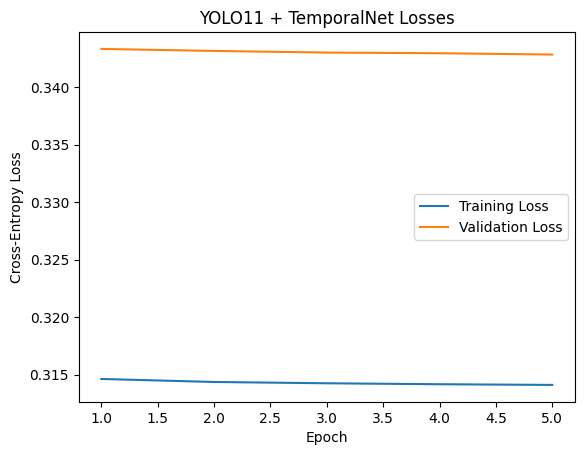

In [42]:
plt.plot(np.arange(1, 6), train_losses, label='Training Loss')
plt.plot(np.arange(1, 6), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('YOLO11 + TemporalNet Losses')
plt.legend()

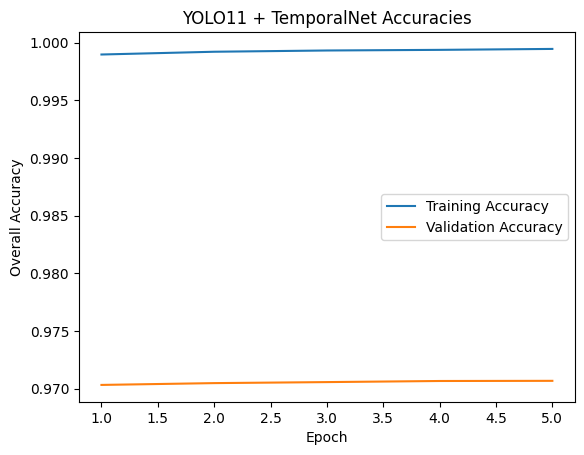

In [43]:
plt.plot(np.arange(1, 6), train_accs, label='Training Accuracy')
plt.plot(np.arange(1, 6), valid_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Overall Accuracy')
plt.title('YOLO11 + TemporalNet Accuracies')
plt.legend()

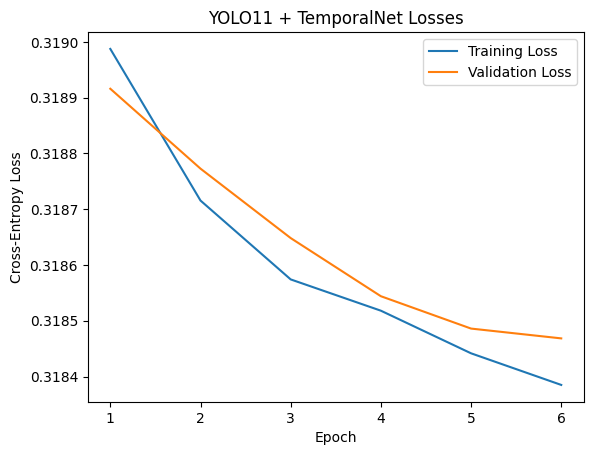

In [47]:
plt.plot(np.arange(1, 7), train_losses, label='Training Loss')
plt.plot(np.arange(1, 7), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('YOLO11 + TemporalNet Losses')
plt.legend()

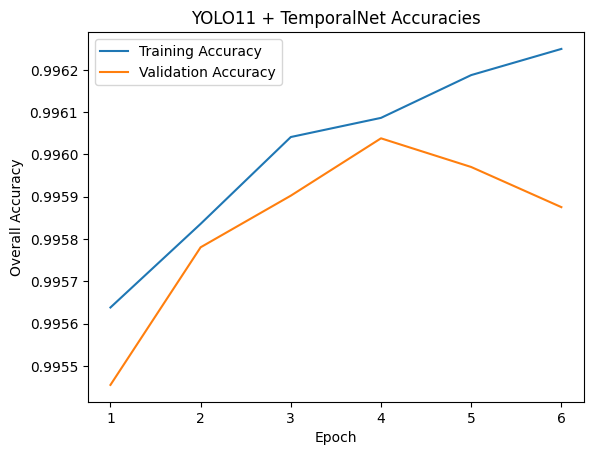

In [49]:
plt.plot(np.arange(1, 7), train_accs, label='Training Accuracy')
plt.plot(np.arange(1, 7), valid_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Overall Accuracy')
plt.title('YOLO11 + TemporalNet Accuracies')
plt.legend()

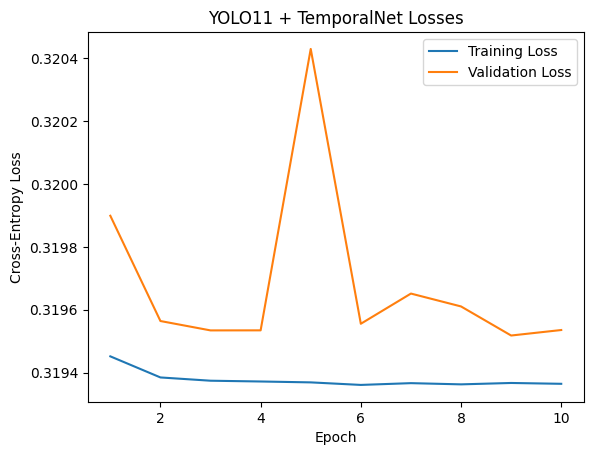

In [10]:
plt.plot(np.arange(1, 11), train_losses, label='Training Loss')
plt.plot(np.arange(1, 11), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('YOLO11 + TemporalNet Losses')
plt.legend()

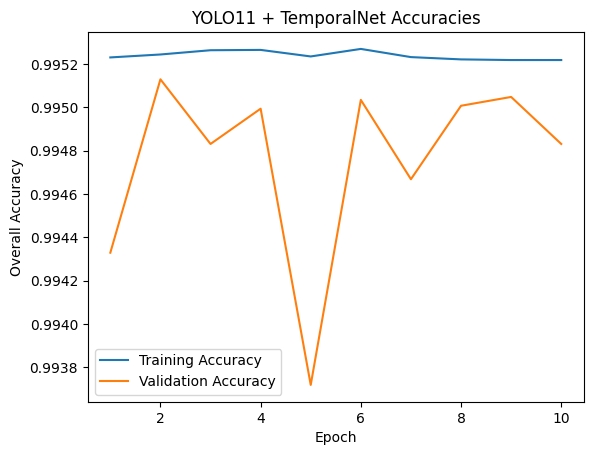

In [11]:
plt.plot(np.arange(1, 11), train_accs, label='Training Accuracy')
plt.plot(np.arange(1, 11), valid_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Overall Accuracy')
plt.title('YOLO11 + TemporalNet Accuracies')
plt.legend()

In [38]:
def validate_metrics(dataloader, yolo, tnet, optimizer, loss_fn, epoch: int):
    # accuracy tracking
    total_loss = 0
    total_correct = 0
    total_samples = 0

    total_males_correct = 0
    total_male_samples = 0
    
    total_females_correct = 0
    total_female_samples = 0

    # precision/recall tracking
    total_male_tp = 0
    total_male_fp = 0
    total_male_fn = 0

    total_female_tp = 0
    total_female_fp = 0
    total_female_fn = 0

    # loop
    num_batches = len(dataloader)
    valid_loop = tqdm(dataloader, total=num_batches)
    
    tnet.eval()
    yolo.eval()
    with torch.no_grad():
        for batch, (img, temp_features, is_male) in enumerate(valid_loop):
            
            # forward pass (YOLO11 + TemporalNet)
            yolo_results = yolo(img)

            yolo_logits = torch.tensor(np.array([yolo_results[idx].probs.data.cpu().numpy() for idx in range(len(yolo_results))]), dtype=torch.float32).cuda()
            tnet_logits = tnet(temp_features)

            # combine logits, get probs and predictions
            logits = yolo_logits + tnet_logits
            probs = logits.softmax(1)
            preds = probs.argmax(1)

            num_samples = temp_features.shape[0]
            num_correct = (preds == is_male).sum().item()

            # track accuracies
            total_samples += num_samples
            total_correct += num_correct
            
#             num_males = is_male.sum().item()
#             num_correct_males = (is_male & (preds == is_male)).sum().item()
            
#             is_female = 1 - is_male
#             inv_preds = 1 - preds
            
#             num_females = is_female.sum().item()
#             num_correct_females = (is_female & (inv_preds == is_female)).sum().item()
            
#             total_males_correct += num_correct_males
#             total_male_samples += num_males

#             total_females_correct += num_correct_females
#             total_female_samples += num_females

            # track precisions/recalls
#             male_tp = (is_male & preds).sum().item()
#             male_fp = (is_female & preds).sum().item()
#             male_fn = (is_male & inv_preds).sum().item()

#             female_tp = (is_female & inv_preds).sum().item()
#             female_fp = (is_male & inv_preds).sum().item()
#             female_fn = (is_female & preds).sum().item()

#             total_male_tp += male_tp
#             total_male_fp += male_fp
#             total_male_fn += male_fn

#             total_female_tp += female_tp
#             total_female_fp += female_fp
#             total_female_fn += female_fn

            # compute loss, backward pass
            batch_loss = loss_fn(probs, is_male)

            losses_sum = batch_loss * num_samples
            total_loss += losses_sum

            # compute metrics
            batch_acc = num_correct / num_samples

            avg_loss = total_loss / total_samples
            avg_acc = total_correct / total_samples
            
#             avg_male_acc = total_males_correct / total_male_samples
#             avg_female_acc = total_females_correct / total_female_samples

#             avg_male_precision = total_male_tp / (total_male_tp + total_male_fp)
#             avg_male_recall = total_male_tp / (total_male_tp + total_male_fn)

#             avg_female_precision = total_female_tp / (total_female_tp + total_female_fp)
#             avg_female_recall = total_female_tp / (total_female_tp + total_female_fn)

            valid_loop.set_description(f'Batch [{batch + 1}/{num_batches}]')
            valid_loop.set_postfix({'Loss': f'{batch_loss:.4f} [{avg_loss:.4f}]',
                             'Acc': f'{(batch_acc * 100):.2f}% [{(avg_acc * 100):.2f}%]'})
        
    return avg_loss.cpu().item(), avg_acc # , avg_male_acc, avg_female_acc, avg_male_precision, avg_male_recall, avg_female_precision, avg_female_recall

In [40]:
eval_results = loops.evaluate_tnet(valid_dataloader, yolo, tnet, ce_loss)

Batch [230/230]: 100%|██████████| 230/230 [28:38<00:00,  7.47s/it, Loss=0.3317 [0.3435], Acc=98.18% [97.01%]]


In [41]:
results_df = pd.DataFrame.from_dict(eval_results)
results_df

,prob_class0,prob_class1,predicted_class,true_class,filename
0,7.489500e-05,9.999251e-01,1,1,/home/hice1/cclark339/scratch/Data/single_nuc_...
1,9.999999e-01,1.548665e-07,0,0,/home/hice1/cclark339/scratch/Data/single_nuc_...
2,9.999696e-01,3.043569e-05,0,0,/home/hice1/cclark339/scratch/Data/single_nuc_...
3,9.999638e-01,3.619543e-05,0,0,/home/hice1/cclark339/scratch/Data/single_nuc_...
4,1.000000e+00,5.844710e-08,0,0,/home/hice1/cclark339/scratch/Data/single_nuc_...
...,...,...,...,...,...
146884,9.999905e-01,9.572248e-06,0,0,/home/hice1/cclark339/scratch/Data/single_nuc_...
146885,9.999979e-01,2.169115e-06,0,0,/home/hice1/cclark339/scratch/Data/single_nuc_...
146886,8.966155e-07,9.999990e-01,1,1,/home/hice1/cclark339/scratch/Data/single_nuc_...
146887,9.999979e-01,2.108892e-06,0,0,/home/hice1/cclark339/scratch/Data/single_nuc_...


In [42]:
results_df[results_df['predicted_class'] != results_df['true_class']].shape[0]

4389

In [43]:
results_df['filename'] = results_df['filename'].str.split('/').apply(lambda x: x[-1])
# results_df['experiment_id'] = results_df['filename'].str.split('__').apply(lambda x: x[0])
# results_df['track_id'] = results_df['filename'].str.split('__').apply(lambda x: x[-2]) if results_df.shape[0] > 1000000 else results_df['filename'].str.split('_').apply(lambda x: x[-2])

In [44]:
results_df

,prob_class0,prob_class1,predicted_class,true_class,filename
0,7.489500e-05,9.999251e-01,1,1,MC_singlenuc59_4_Tk61_060220__0001_vid__3952__...
1,9.999999e-01,1.548665e-07,0,0,MC_singlenuc59_4_Tk61_060220__0001_vid__4432__...
2,9.999696e-01,3.043569e-05,0,0,MC_singlenuc59_4_Tk61_060220__0001_vid__3888__...
3,9.999638e-01,3.619543e-05,0,0,MC_singlenuc43_11_Tk41_060220__0001_vid__2480_...
4,1.000000e+00,5.844710e-08,0,0,MC_singlenuc23_8_Tk33_031720__0001_vid__581__3...
...,...,...,...,...,...
146884,9.999905e-01,9.572248e-06,0,0,MC_singlenuc76_3_Tk47_072920__0001_vid__1712__...
146885,9.999979e-01,2.169115e-06,0,0,MC_singlenuc23_1_Tk33_021220__0002_vid__8931__...
146886,8.966155e-07,9.999990e-01,1,1,MC_singlenuc23_8_Tk33_031720__0001_vid__808__9...
146887,9.999979e-01,2.108892e-06,0,0,MC_singlenuc23_1_Tk33_021220__0002_vid__8931__...


In [46]:
if results_df.shape[0] > 1000000:
    results_df.to_csv('/home/hice1/cclark339/scratch/Data/single_nuc_1/testing_results.csv', index=False)
elif results_df.shape[0] < 100000:
    results_df.to_csv('/home/hice1/cclark339/scratch/Data/single_nuc_1/new4_testing_results.csv', index=False)
else:
    results_df.to_csv('/home/hice1/cclark339/scratch/Data/single_nuc_1/new4_validation_results.csv', index=False)

In [47]:
# overall accuracy

num_correct = results_df.loc[results_df['predicted_class'] == results_df['true_class']].shape[0]
num_samples = results_df.shape[0]

overall_acc = num_correct / num_samples

# class precisions and recalls (aka, class accuracies)

labels = results_df['true_class'].values
preds = results_df['predicted_class'].values

inv_labels = 1 - labels
inv_preds = 1 - preds

male_tp = (labels & preds).sum().item()
male_fp = (inv_labels & preds).sum().item()
male_fn = (labels & inv_preds).sum().item()

female_tp = (inv_labels & inv_preds).sum().item()
female_fp = (labels & inv_preds).sum().item()
female_fn = (inv_labels & preds).sum().item()

male_precision = male_tp / (male_tp + male_fp)
male_recall = male_tp / (male_tp + male_fn)

female_precision = female_tp / (female_tp + female_fp)
female_recall = female_tp / (female_tp + female_fn)

In [48]:
print(f'Avg Overall Accuracy: {(overall_acc * 100):.2f}%')
print(f'Avg Male Accuracy: {(male_recall * 100):.2f}%')
print(f'Avg Female Accuracy: {(female_recall * 100):.2f}%')
print(f'Avg Male Precision: {(male_precision * 100):.2f}%')
print(f'Avg Female Precision: {(female_precision * 100):.2f}%')
print(f'Avg Male Recall: {(male_recall * 100):.2f}%')
print(f'Avg Female Recall: {(female_recall * 100):.2f}%')

Avg Overall Accuracy: 97.01%
Avg Male Accuracy: 96.74%
Avg Female Accuracy: 97.18%
Avg Male Precision: 95.58%
Avg Female Precision: 97.93%
Avg Male Recall: 96.74%
Avg Female Recall: 97.18%


In [32]:
x = torch.tensor(np.array([0, 1, 1, 0, 1]))
y = torch.tensor(np.array([0, 1, 0, 1, 1]))

In [37]:
x_inv = 1 - x
y_inv = 1 - y

In [39]:
print(x_inv)
print(y_inv)

tensor([1, 0, 0, 1, 0])
tensor([1, 0, 1, 0, 0])


In [42]:
(x & (x == y)).sum().item()

2

In [44]:
(x_inv & (x_inv == y_inv)).sum().item()

1

In [46]:
(x == y).sum().item()

3

In [40]:
train_df.shape[0] % 3

2

### YOLO-by-itself

Overall Accuracy: 96.812% \
Male Accuracy: 98.41308% \
Female Accuracy: 95.037% \
Male Precision: 95.65% \
Male Recall: 98.41% \
Female Precision: 98.18% \
Female Recall: 95.04%

### YOLO + OG TNet (first integrated run)

Avg Overall Accuracy: 97.01% \
Avg Male Accuracy: 98.01% \
Avg Female Accuracy: 95.90% \
Avg Male Precision: 96.36% \
Avg Male Recall: 98.01% \
Avg Female Precision: 97.76% \
Avg Female Recall: 95.90%

### YOLO + New TNet (second integrated run)

Avg Overall Accuracy: 97.24% \
Avg Male Accuracy: 98.30% \
Avg Female Accuracy: 96.07% \
Avg Male Precision: 96.52% \
Avg Male Recall: 98.30% \
Avg Female Precision: 98.08% \
Avg Female Recall: 96.07%

Sources listed in their associated cells. Some generative ai was used to assist in writing functions. Temporal feature creation was based on https://cran.r-project.org/web/packages/celltrackR/vignettes/clustering.html, as cited in supplemental work.